## Volcanic hazard exacerbated by future global warming–driven increase in heavy rainfall
### Jamie I. Farquharson, Falk Amelung
Rosenstiel School of Marine and Atmospheric Science, University of Miami, Miami, FL, USA

Corresponding author: jifarq89@googlemail.com

Heavy rainfall drives a range of eruptive and noneruptive volcanic hazards; over the Holocene, the incidence of many such hazards has increased due to rapid climate change. Here we show that extreme heavy rainfall is projected to increase with continued global warming throughout the 21st century in most subaerial volcanic regions, dramatically increasing the potential for rainfall-induced volcanic hazards. This result is based on a comparative analysis of nine general circulation models, and is prevalent across a wide range of spatial scales, from countries and volcanic arcs down to individual volcanic systems.  Our results suggest that if global warming continues unchecked, the incidence of primary and secondary rainfall-related volcanic activity—such as dome explosions or flank collapse—will increase at more than 700 volcanoes around the globe. Improved coupling between scientific observations—in particular, of local and regional precipitation—and policy decisions, may go some way towards mitigating the increased risk throughout the next 80 years.

### This notebook performs all the analysis and plots figures for the research article _Volcanic hazard exacerbated by future global warming–driven increase in heavy rainfall_ [submitted]. 

#### Primary data are from nine general circulation models, obtained through Earth System Grid Federation servers, in particular the node hosted by the Lawrence Livermore National Laboratory https://esgf-node.llnl.gov/search/cmip5/.

The .txt files 'climate_mod_files_pr.txt' and 'climate_mod_files_ta.txt' list the files required for the following analyses. To run these code blocks correctly, please ensure that all correct files are downloaded into your working directory. 

In [1]:
'''
filepath will point to current location of the Jupyter Notebook.
Creates directories if necessary.
'''
import os
from os import path
os.getcwd()
!pwd
def make_tree(directory):
    d = directory
    if not os.path.exists(d):
        os.mkdir(d)
    else:
        print("'{}' directory already exists".format(d))
make_tree("data")
make_tree("climate_mods")
make_tree("climate_figures")
work_dir = os.path.expanduser('work_dir')
filepath = os.getcwd()

/Users/jamiefarquharson/Documents/GitHub/rainfall-in-volcanic-regions
'data' directory already exists
'climate_mods' directory already exists
'climate_figures' directory already exists


### Import packages

In [2]:
'''
Import packages
'''

from netCDF4 import Dataset
import netCDF4

import numpy as np
import numpy.ma as ma
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib as matplotlib
from matplotlib.patches import Polygon, ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.font_manager as font_manager
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rcParams, patheffects
import matplotlib.dates as mdates


buffer = [patheffects.withStroke(linewidth=1, foreground="w", alpha = 0.5)]
plt.rcParams["font.family"] = 'sans-serif'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Computer Modern Sans serif']
plt.rcParams["font.family"] = 'sans-serif'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino']
params = {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}']}
plt.rcParams.update(params)

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
import datetime as dt

import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import scipy
from scipy.stats import gaussian_kde
from scipy import sparse


import os
import skimage
import skimage.transform
import glob
import string as STRING
import fnmatch
import calendar
import time
import pylab
import hashlib
import pickle

from collections import Counter
from scipy.stats import chisquare
print("All packages imported")


All packages imported


In [3]:
filepath = 'pathway/to/directory'

In [ ]:
if os.getcwd() != filepath:
    %cd $filepath

In [6]:
'''
Function converts mm input to inches (for plotting figures the correct size).
'''

def mm2inch(*tupl):
    if isinstance(tupl[0], tuple):
        return tuple(k*0.0393701 for k in tupl[0])
    else:
        return tuple(k*0.0393701 for k in tupl)


In [7]:
def call_plt_params():
    matplotlib.rcParams['text.usetex'] = True 
    matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = 'cm'
    plt.rcParams["font.family"] = 'sans-serif'

In [8]:
'''
Re-orders multi-part names (for example, "Fournaise, Piton de la" becomes "Piton de la Fournaise")
'''
def string_rearranger(string):
    old_string = string
    if ', ' in old_string:
        new_string = old_string.rpartition(', ')[2] +' '+ old_string.rpartition(', ')[0]
    else:
        new_string = old_string
    return new_string

In [9]:
''' For plotting labels '''
labelArgs = {'xy': (0, 1),'xytext': (4,-4),
            'xycoords':'axes fraction',
            'textcoords':'offset points',}
labelKwargs = {
            'color':"k",
            'fontsize':12,
            'path_effects':buffer,
            'ha': 'left',
            'va': 'top',
            'zorder':np.inf}
altArgs =  {'xy': (1, 1),'xytext': (-4,-4),
            'xycoords':'axes fraction',
            'textcoords':'offset points',}

In [10]:
'''Voice alerts'''
def speak(text):
    from IPython.display import Javascript as js, clear_output
    # Escape single quotes
    text = text.replace("'", r"\'")
    display(js(f'''
    if(window.speechSynthesis) {{
        var synth = window.speechSynthesis;
        synth.speak(new window.SpeechSynthesisUtterance('{text}'));
    }}
    '''))
    clear_output(False)

Load in perceptually uniform colourmaps from http://www.fabiocrameri.ch/colourmaps.php, http://doi.org/10.5281/zenodo.1243862

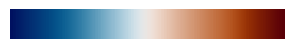

In [11]:
cm_data = np.loadtxt("climate_mods/ScientificColourMaps6/vik/vik.txt")
vik_map = LinearSegmentedColormap.from_list("vik", cm_data)
vik_map_r = LinearSegmentedColormap.from_list("vik", cm_data[::-1])
x = np.linspace(0, 100, 100)[None, :]
fig = plt.figure(1, mm2inch(90,10), dpi=100)
plt.imshow(x, aspect="auto",cmap=vik_map)
plt.axis("off")
plt.show()

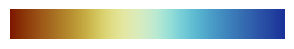

In [12]:

cm_data = np.loadtxt("climate_mods/ScientificColourMaps6/roma/roma.txt")
roma_map = LinearSegmentedColormap.from_list("roma", cm_data)
roma_map_r = LinearSegmentedColormap.from_list("roma", cm_data[::-1])
x = np.linspace(0, 10, 100)[None, :]
fig = plt.figure(1, mm2inch(90,10), dpi=100)
plt.imshow(x, aspect="auto",cmap=roma_map)
plt.axis("off")
plt.show()

In [13]:
'''Segment the "vik" colourmap'''

cmaplist = [vik_map_r(i) for i in range(vik_map_r.N)]
seg_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, vik_map_r.N)

# define the bins and normalise
bounds = np.linspace(-18, 18, 13)
norm = mpl.colors.BoundaryNorm(bounds, vik_map_r.N)


In [14]:
pla = pylab.cm.plasma
inferno = pylab.cm.inferno
def x2clr(x, total):
        return int(x/total*256-1)

### Access volcano information and pre-process

In [15]:
'''
Accesses the most recent GVP volcanoes eruptions lists, saves them as csv files: "Holocene_volcanoes" and "Holocene_eruptions".
'''
!wget --no-check-certificate --output-document Holocene_eruptions.csv "https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=GVP_VOTW:Smithsonian_VOTW_Holocene_Eruptions&outputFormat=csv"
!wget --no-check-certificate --output-document Holocene_volcanoes.csv "https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=GVP_VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=csv"

'''
Read the downloaded csv file(s) into dataframe(s)
'''
volcano_list = pd.read_csv("Holocene_volcanoes.csv")
eruption_list = pd.read_csv("Holocene_eruptions.csv")

'''
Update volcano names to avoid duplicates
'''
temp_list = list(volcano_list.Volcano_Name)
duplicate_names = list(set([x for x in temp_list if temp_list.count(x) > 1]))
duplicate_numbers = []
for j in volcano_list.index:
    if volcano_list.Volcano_Name[j] in duplicate_names:
        volcano_list.Volcano_Name[j] = volcano_list.Volcano_Name[j]+' ' + str(volcano_list.Volcano_Number[j])
        duplicate_numbers.append(volcano_list.Volcano_Number[j])
len(set(duplicate_numbers))
for j in eruption_list.index:
    if eruption_list.Volcano_Number[j] in duplicate_numbers:
        eruption_list.Volcano_Name[j] = eruption_list.Volcano_Name[j]+' ' + str(eruption_list.Volcano_Number[j])

volcanoes = list(set(eruption_list.Volcano_Name)) ## {
print('{} volcano entries found, with a total of {} eruptions.\n{} distinct volcanoes identified.\n{} duplicate names:\n{}'.format(
    len(volcano_list),len(eruption_list),len(volcanoes), len(duplicate_names), duplicate_names))                           

--2022-07-05 19:43:44--  https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=GVP_VOTW:Smithsonian_VOTW_Holocene_Eruptions&outputFormat=csv
Resolving webservices.volcano.si.edu (webservices.volcano.si.edu)... 160.111.244.27
Connecting to webservices.volcano.si.edu (webservices.volcano.si.edu)|160.111.244.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Holocene_eruptions.csv’

Holocene_eruptions.     [           <=>      ]   2.02M   477KB/s    in 5.5s    

2022-07-05 19:43:50 (378 KB/s) - ‘Holocene_eruptions.csv’ saved [2122839]

--2022-07-05 19:43:50--  https://webservices.volcano.si.edu/geoserver/GVP-VOTW/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=GVP_VOTW:Smithsonian_VOTW_Holocene_Volcanoes&outputFormat=csv
Resolving webservices.volcano.si.edu (webservices.volcano.si.edu)... 160.111.244.27
Connecting to webservices.volcano.si.edu (webservices.volca

In [16]:
'''
Extracts latitude and longitude data for each volcano in 'volcano_list' [formatted in the dataframe as 'POINT (x.xx x.xxx)'] (WKT format?).
Updates dataframe with extracted coordinates.
'''

lons = []
lats = []
for j,k in enumerate(volcano_list.GeoLocation):
    lons.append(float(k[7:-1].split()[0])) # Extracts longitude as string, converts to float
    lats.append(float(k[7:-1].split()[1])) # Extracts latitude as string, converts to float
volcano_list['lats'] = lats # Adds latitudes to original dataframe
volcano_list['lons'] = lons # Advods longitudes to original dataframe


lst = list(set(volcano_list.Primary_Volcano_Type))
filtered = fnmatch.filter(lst, 'Sub*') ## Filter out subglacial and submarine eruptions
volcano_list = volcano_list.loc[~volcano_list["Primary_Volcano_Type"].isin(filtered)]
print('Done\nand')

'''
Coordinates ready for plotting
'''
locations = volcano_list[['lats', 'lons']]
locations["name"] = volcano_list.Volcano_Name
locations["number"] = volcano_list.Volcano_Number
locationlist = locations.values.tolist
print('Done')

Done
and
Done


In [17]:
'''
Creates dataframe with eruption information for all active volcanoes
'''
volcano_countries = volcano_list.set_index('Volcano_Number')
all_active_volcanoes = pd.merge(eruption_list,volcano_countries, how = 'inner', on = ['Volcano_Name'])

In [18]:
print("{} volcanoes appear in both databases".format(
    len(set(eruption_list["Volcano_Number"]) &\
        set(volcano_list["Volcano_Number"]))
))

821 volcanoes appear in both databases


In [19]:
'''
Dataframe contains Name, lat, and lon of each eruptive volcano
'''

all_volcano_set_name = []
all_volcano_set_lat = []
all_volcano_set_lon = []
all_volcano_set_point = []

for j, k in enumerate(all_active_volcanoes.Volcano_Name):
    if k not in all_volcano_set_name:
        all_volcano_set_name.append(k)
        all_volcano_set_lat.append(all_active_volcanoes.lats[j])
        all_volcano_set_lon.append(all_active_volcanoes.lons[j])
        all_volcano_set_point.append(all_active_volcanoes.GeoLocation_y[j])
        

all_volcano_set = pd.DataFrame({'Name' :all_volcano_set_name,'lat' : all_volcano_set_lat, 'lon' : all_volcano_set_lon, 'point' : all_volcano_set_point})
all_volcano_set.set_index('Name', inplace = True)
print('{} discrete volcanoes in unfiltered dataset'.format(len(all_volcano_set)))

821 discrete volcanoes in unfiltered dataset


In [20]:
'''
Dataframe contains Name, lat, and lon of each eruptive volcano
'''

volcano_set_name = []
volcano_set_lat = []
volcano_set_lon = []

for j, k in enumerate(all_active_volcanoes.Volcano_Name):
    if k not in volcano_set_name:
        volcano_set_name.append(k)
        volcano_set_lat.append(all_active_volcanoes.lats[j])
        volcano_set_lon.append(all_active_volcanoes.lons[j])

volcano_set = pd.DataFrame({'Name' :volcano_set_name,'lat' : volcano_set_lat, 'lon' : volcano_set_lon})
volcano_set.set_index('Name', inplace = True)

### Read in historical data and plot background figure

**Figure 1a** is reproduced after Capra et al. (2013), using various climate proxy data: magnetic susceptibility data from lake sediment core from Pete-Itzá, Guatemala (Hodell et al. 2008; interpreted to reflect changes in summer precipitation), speleothem calcite δ18O data from central New Mexico (Asmerom et al. 2010; interpreted to reflect changes in winter precipitation), and the Greenland Ice Sheet Project 2 δ18O (Grootes et al. 1993) as a proxy for global temperature.

>Capra, L., Bernal, J. P., Carrasco-Núñez, G. & Roverato, M. Climatic fluctuations as a significant contributing factor for volcanic collapses. Evidence from Mexico during the Late Pleistocene. Glob. Planet. Change 100, 194–203 (2013).

>Hodell, D. A. et al. An 85-ka record of climate change in lowland Central America. Quat. Sci. Rev. 27, 1152–1165 (2008)

>Asmerom, Y., Polyak, V. J. & Burns, S. J. Variable winter moisture in the southwestern United States linked to rapid glacial climate shifts. Nat. Geosci. 3, 114–117 (2010).

>Grootes, P. M., Stuiver, M., White, J. W. C., Johnsen, S. & Jouzel, J. Comparison of oxygen isotope records from the GISP2 and GRIP Greenland ice cores. Nature 366, 552–554 (1993).

In [21]:
''' Magnetic susceptibiliity data from Hodell et al. 2008'''
mag_sus = pd.read_csv("data/magnetic_susceptibility.csv", names = ["year", "ms"])
mag_sus =  mag_sus.sort_values(by = "year")

''' d18O ice core data from Grootes et al. 1993'''
GISP2 = pd.read_csv("data/GISP2.csv")
GISP2['d18O (per mil)'] = GISP2['d18O (per mil)'].replace(999999.0, np.NaN)

''' d18O speleothem data from Amserom et al. 2010'''
speleo = pd.read_csv("data/speleothem-data.csv", names = ["all"])
str_list = list(speleo["all"].values)
str_list=str_list[0].replace('\n', ' ')
sl = str_list.split(" ")

age = []
d18O = []
for i, string in enumerate(sl):
    if float(string) > 0:
        age.append(float(string))
        if i < len(sl):

            if float(string) and float(sl[i+1]) > 0:
                d18O.append(np.NaN)
    else:
        d18O.append(float(string))
speleo_df = pd.DataFrame({"age": age, "d18O": d18O})
speleo_df = speleo_df.sort_values(by = "age")
speleo_df["years_bp"] = 2007-speleo_df["age"].astype(int)

Precipitation data in **Figure 1b,c** from Stasiun Geofisika Winangun (lon, lat: 124.83890, 1.44340) were accessed from Indonesia’s Meteorology, Climatology and Geophysics Agency (Badan Meteorologi, Klimatologi, dan Geofisika: BMKG) data retrieval portal (https://www.bmkg.go.id/). 

In [22]:
winangun = pd.read_csv("data/winangun_rainfall.csv")
d = []
for date in winangun["Date"]:
    d.append(datetime.strptime(date, "%d-%m-%Y"))

winangun["dates"] = d
winangun = winangun.sort_values(by = "dates")

winangun_zeros = [x if not np.isnan(x) else 0 for x in winangun.RR.values]
# plt.step(winangun.dates,winangun_zeros)

Daily data of **Figure 1d,e** (daily rainfall and lahar count through July and August 1991 at Pinatubo) have been digitised from Pierson et al. (1996). 

>Pierson, Thomas C., T. et al. Flow and Deposition of Posteruption Hot Lahars on the East Side of Mount Pinatubo, July-October 1991. in Fire and Mud: Eruptions and Lahars of Mount Pinatubo, Philippines (Philippine Institute of Volcanology and Seismology, 1996)

In [23]:
pinatubo_rainfall_jul_aug =[
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.4,35.7,14.7,
    46.4,125.0,25.0,40.2,31.7,38.4,45.5,2.7,
0.0,0.0,27.7,24.1,2.2,0.0,4.9,56.3,13.4,0.0,
    27.7,2.2,17.9,90.6,10.3,116.5,115.2,46.9,
126.3,54.5,113.8,92.4,454.1,152.7,48.2,58.0,
    86.2,210.1,68.3,21.0,17.0,101.8,60.7,27.7,
]
pinatubo_lahars_jul_aug =[
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    1,0,0,0,2,1,6,5,7,0,1,0,0,2,2,0,0,
    0,8,0,0,2,0,2,3,1,4,5,5,9,1,6,6,17,
    8,3,11,3,12,1,1,3,3,1,1,
]

Merapi rainfall and RSAM data (**Figure 1f,g**) were digitised from Lavigne et al. (2000). Data are from the Plawangan valley for the 19th Feb 1991.

>Lavigne, F., Thouret, J. C., Voight, B., Suwa, H. & Sumaryono, A. Lahars at Merapi volcano, Central Java: an overview. J. Volcanol. Geotherm. Res. 100, 423–456 (2000).


In [24]:
plawangan_rsam = pd.read_csv("data/plawangan_rsam.csv", names = ["rsam"])
plawangan_rain = pd.read_csv("data/plawangan_rainfall.csv", names = ["rainfall"])

base = dt.datetime(1995,2,19,14,20)
num = len(plawangan_rain.rainfall.values)
time_list = [base + dt.timedelta(minutes=(x*10)) for x in range(num)]

In [25]:
def discontinuous(axis1, axis2, d=-0.085):
    ''' connects adjacent axes to indicate discontinuity
    (a.k.a. "broken axis")'''
    kwargs = dict(transform=axis1.transAxes, color='k',lw=.85, clip_on=False)
    axis1.plot((1,1), (-d,0), **kwargs)
    kwargs.update(transform=axis2.transAxes) 
    axis2.plot((0,0), (0,+d), **kwargs)
    con = ConnectionPatch(xyA=(1,-d), xyB=(0,d), coordsA="axes fraction", coordsB="axes fraction",
                              axesA=axis1, axesB=axis2, color="k",
                              linestyle="-",
                              shrinkA=0, shrinkB=0,linewidth = 0.85,
                                zorder = 99)
    axis1.add_artist(con)


In [26]:
def plot_pleistocene(axisList):
    ax1 = axisList[0]
    ax2 = axisList[1]
    ax3 = axisList[2]
    for axis in [ax1,ax2,ax3]:
        axis.set_facecolor("None")
        axis.set_xlim(40.000, 11.630)
        axis.spines["top"].set_visible(False)
        axis.spines["bottom"].set_visible(False)

    ax1.plot(mag_sus.year/1e3, mag_sus.ms, color = "k", lw=1)

    ax1.set_ylabel("Magnetic\nsusceptibility\n"+r"[SI $\times$10$^{-6}$]")
    ax1.spines["right"].set_visible(False)
    ax1.spines["top"].set_visible(False)


    ax2.plot(speleo_df["age"]/1e3, speleo_df["d18O"], lw=1, color = "midnightblue")
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    
    ax2.set_ylabel(r"$\delta^{18}$O [{{\textperthousand}}]", rotation = 270, labelpad=12)
    ax2.spines["left"].set_visible(False)
    ax2.set_ylim(-5,-12)


    ax3.plot(GISP2["Age (yr BP)"]/1e3,GISP2["d18O (per mil)"], color = "firebrick", lw=1)
    ax3.set_ylabel(r"$\delta^{18}$O [{{\textperthousand}}]")
    ax3.spines["right"].set_visible(False)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.spines["bottom"].set_visible(True);ax3.set_xlabel("ky [BP]")



    ax1.hlines(60, 12.561, 12.957, color = "midnightblue", lw = 1)
    ax1.hlines(70, 12.568, 13.374, color = "midnightblue", lw = 1)
    ax1.plot(12.680, 60, marker = "o",ms=1.5,mfc="None", lw=0, mec = "midnightblue")
    ax1.plot(13.075, 70, marker = "o",ms=1.5,mfc="None", lw=0, mec = "midnightblue")



    ax1.hlines(70, 14.151, 15.031, color = "firebrick", lw = 1)
    ax1.plot(14.580, 70, marker = "o",ms=1.5,mfc="None", lw=0, mec = "firebrick")

    ax1.hlines(70, 19.423, 20.117, color = "teal", lw = 1)
    ax1.hlines(60, 19.259, 19.634, color = "teal", lw = 1)
    ax1.plot(19.460, 60, marker = "o",ms=1.5,mfc="None", lw=0, mec = "teal")
    ax1.plot(19.720, 70, marker = "o",ms=1.5,mfc="None", lw=0, mec = "teal")

    ax1.hlines(60,31.195,34.514, color = "steelblue", lw = 1)
    ax1.hlines(70,31.805,34.692, color = "steelblue", lw = 1)
    ax1.plot(32.20, 60, marker = "o",ms=1.5,mfc="None", lw=0, mec = "steelblue")
    ax1.plot(33.20, 70, marker = "o",ms=1.5,mfc="None", lw=0, mec = "steelblue")

    colors = ["midnightblue", "firebrick"]
    for i, axis in enumerate([ax2,ax3]):
        axis.spines["{}".format(["right", "left"][i])].set_color(colors[i])
        axis.yaxis.label.set_color(colors[i])
        axis.tick_params(axis='y',colors=colors[i])

    ax1.annotate("Cofre de Perote", xy = (12.80,75),xycoords = "data",
                 xytext = (-4,5), textcoords = "offset points",
                 fontsize = "medium", path_effects=buffer, ha= "left", color = "midnightblue")
    ax1.annotate("Colima", xy = (14.580,75),xycoords = "data",
                  xytext = (4,5), textcoords = "offset points",
                 fontsize = "medium", path_effects=buffer, ha= "right", color = "firebrick")
    ax1.annotate("Citlaltépetl", xy = (19.7,75),xycoords = "data",
                  xytext = (0,5), textcoords = "offset points",
                 fontsize = "medium", path_effects=buffer, ha= "center", color = "teal")
    ax1.annotate("Toluca", xy = (32.70,75),xycoords = "data",
                  xytext = (0,5), textcoords = "offset points",
                 fontsize = "medium", path_effects=buffer, ha= "center", color = "steelblue")
    
    for axis in [ax1, ax2, ax3]:
        for date in [33.2,32.2,19.46,19.72,14.58,13.075,12.680]:
            axis.axvline(date,lw=1,color="lightgrey", zorder = 0, alpha = 1) 

    ax3.spines["bottom"].set_zorder(11)

In [27]:
def plot_winangun(axis):

    ax= axis
    ax.step(winangun.dates,winangun_zeros, lw = .85, 

           color = "k",where = "mid"
          )
    ax.set_ylabel("Precipitation [mm]")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])

    ax.set_ylim(-(100/7),100)
    ax1 = ax.twinx()
    ax1.set_ylim(0,8)
    date = winangun.dates[np.argmax(winangun.RR)]
    ax1.vlines(date,0, 1, color = ["firebrick"], alpha = 1, lw=1, 
    #                   label = name_volc
                  )
    for spine in ["top", "right", "left"]:
        ax1.spines[spine].set_visible(False)
    ax1.set_yticks([])
    ax.spines["left"].set_bounds(0,100)
    
    locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel("Day")
    ax.set_xlim(winangun.dates.min(),winangun.dates.max())

In [28]:
def plot_winangun_pdf(axis):
    axin1= axis
   
    n, bins, patches = axin1.hist(winangun.RR, bins = 20, orientation = "horizontal", #histtype="stepfilled",
               color= "k",density = True, lw=.5,)# ec="steelblue")
    patches[-1].set_facecolor("firebrick")
    axin1.set_ylim(0,100)
    axin1.set_yticks([0,100])
    axin1.set_xlim(xmin=-5e-3)
    axin1.set_xlabel("PDF", )#fontsize="small")
    axin1.set_facecolor("None")
    for spine in ["top","right","bottom"]:
        axin1.spines[spine].set_visible(False)
    axin1.set_xticks([])
    axin1.annotate("", xy = (0.001,90
                            ),xycoords = "data",
                  xytext=(20, 0), textcoords='offset points',arrowprops=dict(arrowstyle="-|>",
                                color="k"))


In [29]:
def plot_pinatubo_lahars(axis):
    ax = axis
    ax.step(date_list,pinatubo_rainfall_jul_aug,where = "mid", color = "k", lw=1)
    ax1 = ax.twinx()

    ax1.step(date_list,pinatubo_lahars_jul_aug,where = "mid", color = "steelblue", lw=1, zorder= 0)
    ax1.set_ylim(22,-25)
    ax.set_ylim(-500,500)

    ax.set_yticks([0, 500])
    ax1.spines["left"].set_visible(False)
    ax.spines["left"].set_bounds(0,500)

    ax1.set_yticks([0, 20])
    ax.spines["right"].set_visible(False)
    ax1.spines["right"].set_bounds(0,20)

    ax.spines["top"].set_visible(False)
    ax1.spines["top"].set_visible(False)

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.set_ylabel("Precipitation [mm]", )
    ax.set_xlabel("Day",)
    ax1.set_ylabel("Lahar\nfrequency", rotation=270,labelpad=15,)
    ax.yaxis.set_label_coords(-.15,.7)
    ax1.yaxis.set_label_coords(1.2,.25)
    
    for i, axis in enumerate([ax1]):
        axis.spines["right"].set_color("steelblue")
        axis.yaxis.label.set_color("steelblue")
        axis.tick_params(axis='y',colors="steelblue")
    
    ax.set_xlim(datetime(1991,7,1), datetime(1991, 8, 31))

base = dt.datetime(1991,7,1)
numdays = 62
date_list = [base + dt.timedelta(days=x) for x in range(numdays)]

In [30]:
a = pinatubo_rainfall_jul_aug;v= pinatubo_lahars_jul_aug
a = (a - np.mean(a)) / (np.std(a) * len(a))
v = (v - np.mean(v)) /  np.std(v)
a =np.reshape(a, a.size)
v =np.reshape(v, v.size)
''' Cross-correlation statistics for
the Pinatubo time-series data'''
def plot_pinatubo_cc(axis, verb=False):
    ax = axis
    corr = np.correlate(v,a,
                            mode='full')

    lags = np.arange(-len(a) + 1, len(a))
    ax.plot(lags,corr, label = "lahars", lw=1, color="k")
    lag = corr.argmax() - (len(a) - 1)
    ax.set_ylabel("correlation coeff.",)
    ax.set_xlabel("lag [days]", )
    ax.set_xlim(-10,50)
    ax.axvline(color="grey", zorder = 0, lw = 1)
    ax.set_ylim(-.25,1.25)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["left"].set_bounds(0,1)
    if verb == True:
        print("max cc: {}; lag: {}".format(corr.max(), corr.argmax() - (len(a) - 1)))

In [31]:
def plot_merapi_rsam(axis):
    ax = axis
    ax.step(time_list, plawangan_rain.values,where = "mid", color = "k", lw=1)
    ax1 = ax.twinx()

    ax1.plot(time_list, plawangan_rsam.values, color = "steelblue", lw=1, zorder= 0)
    ax.set_ylim(-15,15)
    ax1.set_ylim(550,-600)

    ax.set_yticks([0, 15])
    ax1.spines["left"].set_visible(False)
    ax.spines["left"].set_bounds(0,15)

    ax1.set_yticks([0, 500])
    ax.spines["right"].set_visible(False)
    ax1.spines["right"].set_bounds(0,500)

    ax.spines["top"].set_visible(False)
    ax1.spines["top"].set_visible(False)

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.set_ylabel("Precipitation [mm]", )
    ax.set_xlabel("Time [HH:MM]", )
    ax1.set_ylabel("RSAM", rotation=270,labelpad=12,)

    ax.yaxis.set_label_coords(-.15,.7)
    ax1.yaxis.set_label_coords(1.2,.25)



    for i, axis in enumerate([ax1]):
        axis.spines["right"].set_color("steelblue")
        axis.yaxis.label.set_color("steelblue")
        axis.tick_params(axis='y',colors="steelblue")
        
    ax.set_xlim(datetime(1995,2,19,14,20), datetime(1995,2,19,21,10))


In [32]:
a_ = plawangan_rain.values;v_= plawangan_rsam.values
a_ = (a_ - np.mean(a_)) / (np.std(a_) * len(a_))
v_ = (v_ - np.mean(v_)) /  np.std(v_)
a_=np.reshape(a_, a_.size)
v_=np.reshape(v_, v_.size)
''' Cross-correlation statistics for
the Merapi time-series data'''
def plot_merapi_cc(axis,verb=False):
    ax = axis
    corr = np.correlate(v_,a_,
                       mode='full')

    lags = np.arange(-len(a_) + 1, len(a_),1)
    ax.plot(lags,corr, label = "lahars", lw=1, color="k")

    lag = corr.argmax() - (len(a_) - 1)
    ax.set_ylabel("R", fontsize = "small")
    ax.set_xlabel("lag [min]", fontsize = "medium")
    ax.set_xlim(-1,12)
    ax.axvline(1,color="grey", zorder = 0, lw = 1)
    ax.set_ylim(-.25,1.25)
    ax.set_xticks(np.arange(0,13,6))
    ax.set_xticklabels(np.arange(0,13,6)*10)

    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        
    ax.spines["left"].set_bounds(0,1)
    if verb == True:
        print("max cc: {}; lag: {}".format(corr.max(), corr.argmax() - (len(a_) - 1)))


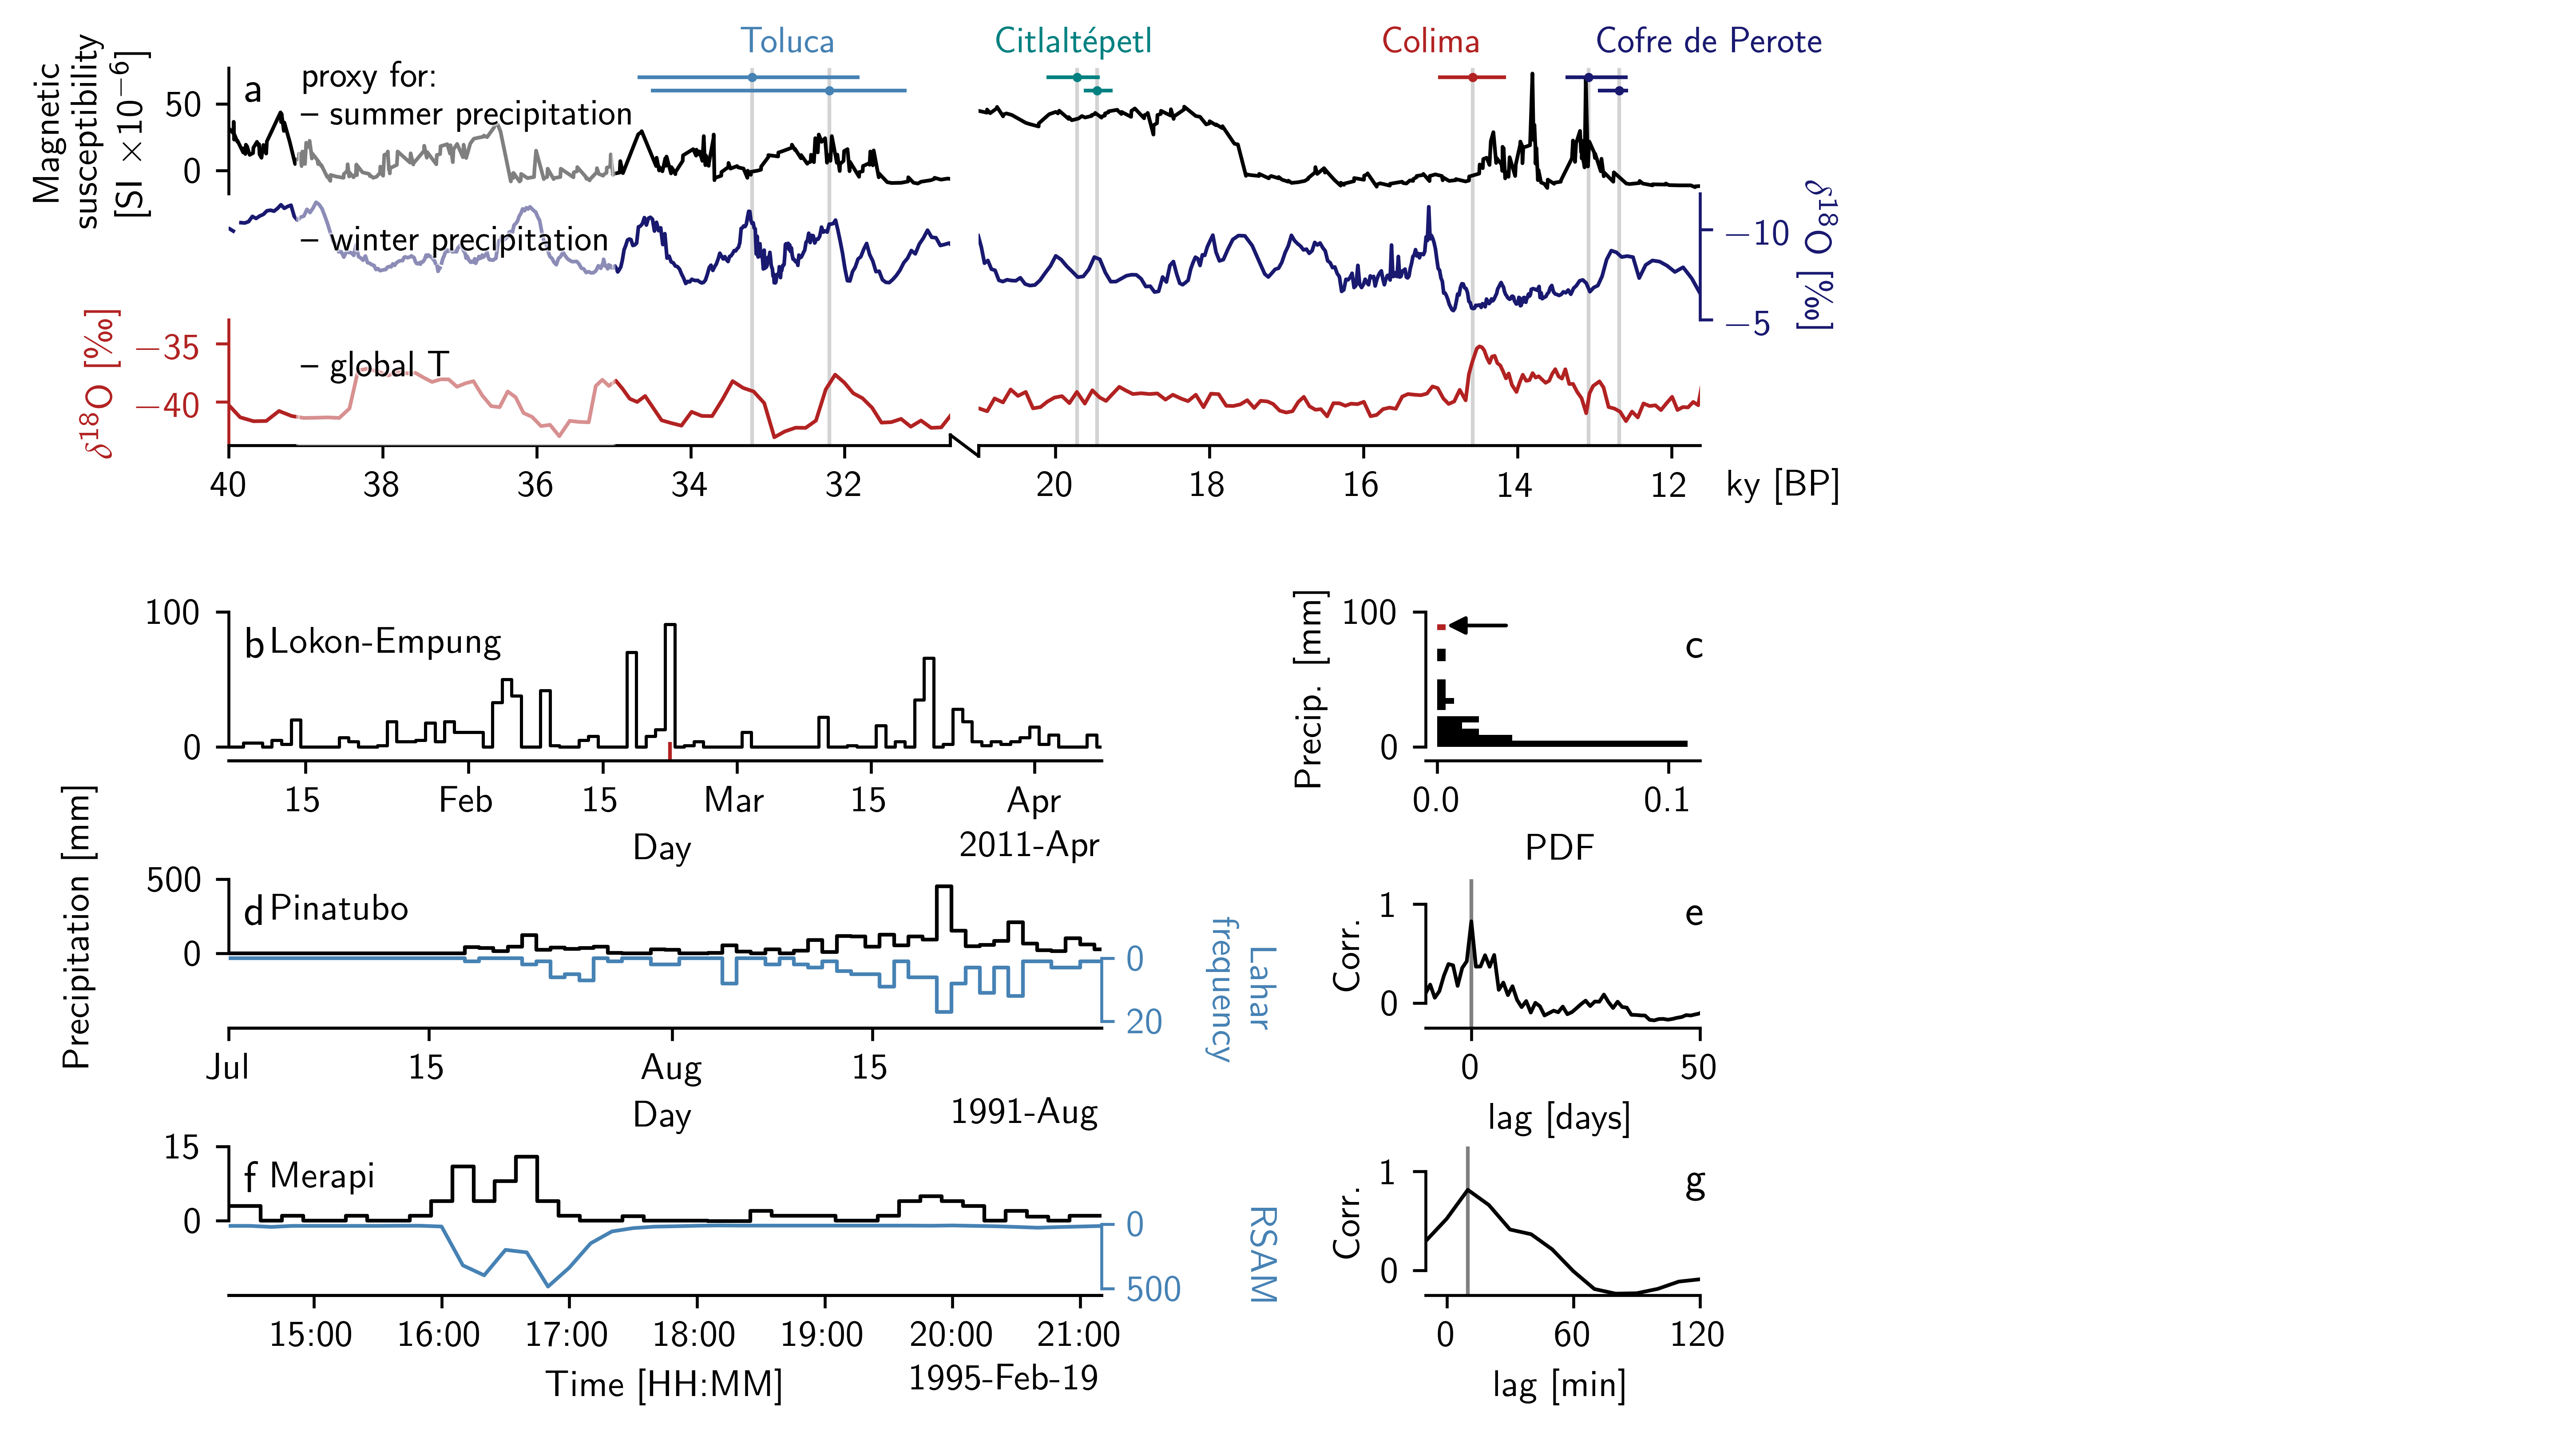

In [33]:
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(181,120)), frameon=True, dpi=600)
gs = plt.GridSpec(4, 10, figure=fig, hspace=.8
                 )

axs = [fig.add_subplot((gs[0,:])),
       fig.add_subplot((gs[1,0:6])),
       fig.add_subplot((gs[1,8::])),

       fig.add_subplot((gs[2,0:6])),
       fig.add_subplot((gs[2,8::])),
       
       fig.add_subplot((gs[3,0:6])),
       fig.add_subplot((gs[3,8::])),
      ]



axs[0].axis("off")

ax1 = fig.add_axes([0.125,1.0,.38,0.1])
ax2 = fig.add_axes([0.125,0.9,.38,0.1])
ax3 = fig.add_axes([0.125,0.8,.38,0.1])
ax1b = fig.add_axes([0.52,1.0,.38,0.1])
ax2b = fig.add_axes([0.52,0.9,.38,0.1])
ax3b = fig.add_axes([0.52,0.8,.38,0.1])

plot_pleistocene([ax1,ax2,ax3])
plot_pleistocene([ax1b,ax2b,ax3b])
for axis in [ax1, ax2, ax3]:
    axis.set_xlim(40,30.63)
for axis in [ax1b, ax2b, ax3b]:
    axis.set_xlim(21,11.630)
for axis in [ax1b, ax2, ax3b]:
    axis.set_ylabel("")    
for axis in [ax1b, ax3b]:
    axis.spines["left"].set_visible(False)
    axis.set_yticks([])
ax2.spines["right"].set_visible(False)
ax2.set_yticks([])
ax3.set_xlabel("")


plot_winangun(axs[1])
plot_winangun_pdf(axs[2])
plot_pinatubo_lahars(axs[3])
plot_pinatubo_cc(axs[4])
plot_merapi_rsam(axs[5])
plot_merapi_cc(axs[6])

for axis in axs:
    axis.set_facecolor("None")
    

axs[1].set_ylim(-10,100)
axs[1].spines["left"].set_bounds(0,100)
axs[2].set_ylim(-10,100)
axs[2].spines["left"].set_bounds(0,100)

axs[1].set_ylabel("")
axs[5].set_ylabel("")


axs[4].set_ylabel("", fontsize = "medium")
axs[6].set_ylabel("", fontsize = "medium")

axs[2].spines["bottom"].set_visible(True)
axs[2].set_xticks([0,0.1])

ax3b.xaxis.set_label_coords(1.12,-0.18)

discontinuous(ax3, ax3b, d=-0.085)

for i in range(1,7):
    args = labelArgs if i%2!=0 else altArgs
# 
    axs[i].annotate(STRING.ascii_lowercase[i],**args, **labelKwargs, fontweight="normal")
axs[0].annotate("a", xy = (0,1), xytext = (4,74), xycoords = "axes fraction", textcoords = "offset points",
                **labelKwargs, fontweight="normal")

ax1.annotate("proxy for:\n--~summer precipitation", xy = (0.1,0.55),
             xycoords="axes fraction", path_effects = buffer, zorder=np.inf)
ax2.annotate("--~winter precipitation", xy = (0.1,0.55),
             xycoords="axes fraction", path_effects = buffer, zorder=np.inf, )#color="midnightblue")
ax3.annotate("--~global T", xy = (0.1,0.55),
             xycoords="axes fraction", path_effects = buffer, zorder=np.inf, )#color="firebrick")

for axis in [ax1, ax2, ax3]:
    axis.axvspan(35,39.1, zorder = 1000, alpha = .5,color="w")

axs[1].annotate("Lokon-Empung",  xy = (0.05,.6), xycoords="axes fraction", #xy = (datetime(2011,1,5),100), xycoords="data", 
             xytext=(0,5), textcoords="offset points",#color="firebrick",
            fontsize = "medium")
axs[3].annotate("Pinatubo", xy = (0.05,.6), xycoords="axes fraction", 
             xytext=(0,5), textcoords="offset points",#color="steelblue",
            fontsize = "medium")
axs[5].annotate("Merapi",  xy = (0.05,.6), xycoords="axes fraction", #xy = (datetime(1995,2,19,15,0),15), xycoords="data", 
             xytext=(0,5), textcoords="offset points",#color="steelblue",
            fontsize = "medium")

axs[2].set_ylabel("Precip. [mm]")
axs[4].set_ylabel("Corr.", fontsize = "medium")
axs[6].set_ylabel("Corr.", fontsize = "medium")


plt.savefig("climate_figures/figure_1.png", bbox_inches="tight")
plt.savefig("climate_figures/figure_1.pdf", bbox_inches="tight")
plt.show()


### Figure 1 | Extreme rainfall as a driver of volcanic hazards.  

**a** Pleistocene volcanic sector collapses of Volcán de Colima, Nevado de Toluca, Citlaltépetl, and Cofre de Perote (Mexico), reproduced after (Capra et al., 2013). Climate proxy data are described in the Methods. For each of the seven collapses, horizontal date ranges are indicated, as well as a vertical line highlighting the maximum probability collapse date. Note discontinuous x-axis. 


**b** The February 2011 eruption of Lokon-Empung is shown by a vertical line, alongside time-series of local precipitation data. 

__c__ Lognormal distribution of precipitation data from **b**, with outlying value (corresponding to date of eruption) indicated.

**d** Daily precipitation data (black) is plotted against the number of lahars per day (blue) observed at Pinatubo between July and September 1991. 

__e__ Result of cross-correlation analysis of Pinatubo data shown in **d**, shown as correlation coefficient (“Corr.”) between daily precipitation and lahar frequency versus lag.

**f** Precipitation in ten-minute bins at Merapi volcano, alongside the RSAM value at the same temporal resolution. RSAM maxima reflect peak lahar surges. 

__g__ Result of cross-correlation analysis of Merapi data shown in **f**, shown as correlation coefficient between ten-minute precipitation and RSAM value versus lag.

Refer to Methods for all data sources.

### Functions for reading and processing climate data

####  Model output data have been obtained through Earth System Grid Federation servers, in particular the node hosted by the Lawrence Livermore National Laboratory https://esgf-node.llnl.gov/search/cmip5/.

The .txt files 'climate_mod_files_pr.txt' and 'climate_mod_files_ta.txt' list the files required for the following analyses.

In [34]:
def prModelFiles():
    ''' Return list of precipitation files used throughout '''
    prFile = 'climate_mods/climate_mod_files_pr.txt'
    f = open(prFile)
    f.seek(0)
    pr_mods = f.readlines()
    f.close()
    return [i.strip('\n') for i in pr_mods]

In [35]:
def taModelFiles():
    ''' Return list of temperature files used throughout '''
    taFile = 'climate_mods/climate_mod_files_ta.txt'
    f = open(taFile)
    f.seek(0)
    ta_mods = f.readlines()
    f.close()
    return [i.strip('\n') for i in ta_mods]

In [36]:
prModelFiles(),\
taModelFiles()

(['pr_Amon_inmcm4_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_MIROC5_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_CNRM-CM5_rcp85_r1i1p1_200601-205512.nc',
  'pr_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_NorESM1-M_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_CSIRO-Mk3-6-0_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_MRI-CGCM3_rcp85_r1i1p1_200601-210012.nc',
  'pr_Amon_CNRM-CM5_rcp85_r1i1p1_205601-210012.nc',
  'pr_Amon_IPSL-CM5A-MR_rcp85_r1i1p1_200601-210012.nc'],
 ['ta_Amon_MIROC5_rcp85_r1i1p1_210001-210012.nc',
  'ta_Amon_NorESM1-M_rcp85_r1i1p1_200601-210012.nc',
  'ta_Amon_MRI-CGCM3_rcp85_r1i1p1_208601-209512.nc',
  'ta_Amon_CSIRO-Mk3-6-0_rcp85_r1i1p1_206601-208512.nc',
  'ta_Amon_CSIRO-Mk3-6-0_rcp85_r1i1p1_204601-206512.nc',
  'ta_Amon_inmcm4_rcp85_r1i1p1_209601-210012.nc',
  'ta_Amon_CSIRO-Mk3-6-0_rcp85_r1i1p1_202601-204512.nc',
  'ta_Amon_inmcm4_rcp85_r1i1p1_204601-205512.nc',
  'ta_Amon_MIROC5_rcp85_r1i1p1_204001-204912.

In [37]:
''' Models used '''
fileNameCodes = [['NorESM1-M',
  'CSIRO-Mk3-6-0',
  'MRI-CGCM3',
  'ACCESS1-3',
  'inmcm4',
  'MIROC5',
  'IPSL-CM5A-MR',
  'CanESM2',
  'CNRM-CM5']]

#### Ensure ```list_of_models``` function ```line 3``` points to directory containing the NETCDF model files.

In [93]:
def list_of_models(parameter = "pr", modelName =""):
    import glob as glob
    models = [mod for mod in glob.glob("climate_mods/rcp85/{}*".format(parameter))]
    modelList = []
    for modelString in models:
        if modelName in modelString:
            modelList.append(modelString)
    return sorted(modelList)

In [39]:
def hash_bytestr_iter(bytesiter, hasher, ashexstr=False):
    ''' Written by Omnifarious:
    https://stackoverflow.com/a/3431835/11191589'''
    for block in bytesiter:
        hasher.update(block)
    return hasher.hexdigest() if ashexstr else hasher.digest()

def file_as_blockiter(afile, blocksize=65536):
    ''' Written by Omnifarious:
    https://stackoverflow.com/a/3431835/11191589'''
    with afile:
        block = afile.read(blocksize)
        while len(block) > 0:
            yield block
            block = afile.read(blocksize)

def checksum(parameter="pr", modelName=""):
    fnamelst = list_of_models(parameter=parameter, modelName=modelName)
    return [(fname, hash_bytestr_iter(file_as_blockiter(open(fname, 'rb')), hashlib.md5()))
    for fname in fnamelst]

def compare_checksum():
    ''' To ensure that the models used are the same files or are not corrupted.
    Sensible to run once .nc files have been downloaded into the relevant directory.'''
    checkFile = 'checkfile.txt'
    f = open(checkFile)
    f.seek(0)
    checks = f.readlines()
    f.close()
    
    for i in range(9):
        checkSum = checksum(parameter="pr", modelName=fileNameCodes[0][i])
        
        if str(checkSum[0][1]) == checks[i].strip('\n'):
            print("\033[42;33mChecksum verified\033[m")
        else:
            print("Checksum not verified. File may be corrupted, or a different version.")

In [40]:
def model_info(parameter="pr", modelName="", checkSum=False):
    try:
        modelFile = netCDF4.MFDataset(list_of_models(parameter=parameter, modelName=modelName))
        if checkSum == False:
            print('model: {}; var: {}; (time,lat,lon) : {}; (la,lo) : {:.1f} {:.1f}'.format(
        modelFile.__dict__['model_id'],
        modelFile.variables[parameter].long_name,
        modelFile.variables[parameter].shape,
        modelFile.variables['lat'][0],
        modelFile.variables['lon'][0]
    ))
            modelFile.close()
        else:
            checksum = checksum(parameter=parameter, modelName=modelName)
            print(checksum)
    except:
        print("Error reading {}".format(modelName)) ## checksum here

In [41]:
def model_lalo(parameter="pr", modelName=""):
    import netCDF4
    try:
        modelFile = netCDF4.MFDataset(list_of_models(parameter=parameter, modelName=modelName))
        return modelFile.variables["lat"][:], modelFile.variables["lon"][:]
    except:
        print("Error reading {}".format(modelName))

In [42]:
def volcano_ij(volcano, lats, lons, verbose = False):
    volcano = volcano
    lon_vals = lons
    lat_vals = lats
    try:
        name_volc = volcano
        lat_volc = volcano_set.loc[[name_volc]].lat.values[0]
        lon_volc = volcano_set.loc[[name_volc]].lon.values[0]+180

        '''
        Data are not infinite, so these lambda functions determine the latitude and longitute in the NCDF4 file(s) that
        are *closest* to the precise coordinates of a given volcano. Volcano coordinates are defined above (lat_volc, lon_volc),
        and typically correspond to the summit or centre of the caldera region.
        '''
        j_volc = min(lon_vals, key=lambda x:abs(x-lon_volc))
        i_volc = min(lat_vals, key=lambda x:abs(x-lat_volc))
        if verbose == True:
            print("({:.1f},{:.1f}) --> ({:.1f},{:.1f})".format(
            lat_volc,lon_volc, i_volc, j_volc))
        return i_volc, j_volc
    except:
        print("Problem with {}".format(string_rearranger(volcano)))
  

In [43]:
def volcano_list_ij(volcanoList, lats, lons, verbose = False):
    volcanoList = volcanoList
  
    lon_vals = lons
    lat_vals = lats
    tup_list = []

    try:
        for volcano in volcanoList:
            name_volc = volcano
            lat_volc = volcano_list[volcano_list["Volcano_Name"] == volcano].lats.values[0]
            lon_volc = volcano_list[volcano_list["Volcano_Name"] == volcano].lons.values[0]+180

            '''
            Data are not infinite, so these lambda functions determine the latitude and longitute in the NCDF4 file(s) that
            are *closest* to the precise coordinates of a given volcano. Volcano coordinates are defined above (lat_volc, lon_volc),
            and typically correspond to the summit or centre of the caldera region.
            '''
            j_volc = min(lon_vals, key=lambda x:abs(x-lon_volc))
            i_volc = min(lat_vals, key=lambda x:abs(x-lat_volc))
            if verbose == True:
                print("({:.1f},{:.1f}) --> ({:.1f},{:.1f})".format(
                lat_volc,lon_volc, i_volc, j_volc))
            tup_list.append((i_volc, j_volc))
        return list(set(tup_list))
    except:
        print("Problem with {}".format(string_rearranger(volcano)))

#### Sanity check 

In [94]:
''' Convert geolocation to model-specific (i,j) coordinates''' 
lat, lon = model_lalo(parameter="pr", modelName=fileNameCodes[0][1])
volcano_ij(volcano = "St. Helens", lats = lat, lons = lon)

(45.698692321777344, 58.125)

In [45]:
def global_mean_temp(modelName, method = "max", verbose = False):
    ''' "how" method deprecated, use .agg().
    Can be either either "max" or "mean" '''
    try:
        modelFile = netCDF4.MFDataset(list_of_models(parameter="ta", modelName=modelName))
        startString = modelFile.variables["time"].units.split()[2] # Days since XXX date
        start = datetime.strptime(startString, "%Y-%m-%d")
        time = [start+timedelta(int(x)) for x in modelFile.variables["time"][:]]
        model_gmT = []
        for x in range(modelFile.variables["ta"].shape[0]):
            model_gmT.append(np.nanmean(modelFile.variables["ta"][x][0]))
        gmT_df = pd.DataFrame(
    {'ix':time,'date':time, ##
     'temp': model_gmT
    })
        gmT_df=gmT_df.set_index('ix')
        gmT_df.index = pd.to_datetime(gmT_df.index)
        gmT = gmT_df.resample("Y").agg(method)


        modelFile.close()
        if verbose == True:
            print("{} succesfully processed".format(modelName))
        return gmT, gmT_df
    except:
        print("Error reading {}".format(modelName))

def heavy_rainfall(i_volc, j_volc, modelName="", method = "max", verbose = False):
    ''' "how" method deprecated, use .agg().
    Can be either either "max" or "mean" '''
    try:
        modelFile = netCDF4.MFDataset(list_of_models(parameter="pr", modelName=modelName))
        startString = modelFile.variables["time"].units.split()[2] # Days since XXX date
        start = datetime.strptime(startString, "%Y-%m-%d")
        time = [start+timedelta(int(x)) for x in modelFile.variables["time"][:]]
        rx_volc = []
        lat_vals = modelFile.variables["lat"][:]
        lon_vals = modelFile.variables["lon"][:]
        i = int(np.where(lat_vals==i_volc)[0])
        j = int(np.where(lon_vals==j_volc)[0])
        prcp = list(modelFile.variables["pr"][:,i,j])
        temp_df = pd.DataFrame(
    {'ix':time,'date':time, ##
     'rainfall': prcp
    })
        temp_df=temp_df.set_index('ix')
        temp_df.index = pd.to_datetime(temp_df.index)
        RX1 = temp_df.resample("Y").agg(method)
        modelFile.close()
        if verbose == True:
            print("{} succesfully processed".format(modelName))
        return temp_df, RX1
    except:
        print("Error reading {}".format(modelName))
        


In [46]:
def heavy_rainfall_area(listOfVolcanoes, modelName="", method = "max", verbose = False):
    ''' "how" can be either "max" or "mean" '''
    try:
        modelFile = netCDF4.MFDataset(list_of_models(parameter="pr", modelName=modelName))
        startString = modelFile.variables["time"].units.split()[2] # Days since XXX date
        start = datetime.strptime(startString, "%Y-%m-%d")
        time = [start+timedelta(int(x)) for x in modelFile.variables["time"][:]]

        
        lat_vals = modelFile.variables["lat"][:]
        lon_vals = modelFile.variables["lon"][:]
        tup_list = volcano_list_ij(volcanoList=listOfVolcanoes, lats=lat_vals, lons=lon_vals)

        lat_array = [int(np.where(lat_vals == x[0])[0]) for x in tup_list]
        lon_array = [int(np.where(lon_vals == x[1])[0]) for x in tup_list]
        av_areal_prcp = [modelFile.variables["pr"][i][(lat_array,lon_array)].mean() \
                 for i in range(len(modelFile.variables["time"]))]
        temp_df = pd.DataFrame(
    {'ix':time,'date':time, ##
     'rainfall': av_areal_prcp
    })
        temp_df=temp_df.set_index('ix')
        temp_df.index = pd.to_datetime(temp_df.index)
        RX = temp_df.resample("Y").agg(method)


        modelFile.close()
        if verbose == True:
            print("{} succesfully processed".format(modelName))
        return temp_df, RX
    except:
        print("Error reading {}".format(modelName))

In [47]:
def get_all_boundary_edges(bool_img):
    """
    Get a list of all edges
    (where the value changes from 'True' to 'False') in the 2D image.
    Return the list as indices of the image.
    """
    ij_boundary = []
    ii, jj = np.nonzero(bool_img)
    for i, j in zip(ii, jj):
        # North
        if j == bool_img.shape[1]-1 or not bool_img[i, j+1]:
            ij_boundary.append(np.array([[i, j+1],
                                         [i+1, j+1]]))
        # East
        if i == bool_img.shape[0]-1 or not bool_img[i+1, j]:
            ij_boundary.append(np.array([[i+1, j],
                                         [i+1, j+1]]))
        # South
        if j == 0 or not bool_img[i, j-1]:
            ij_boundary.append(np.array([[i, j],
                                         [i+1, j]]))
        # West
        if i == 0 or not bool_img[i-1, j]:
            ij_boundary.append(np.array([[i, j],
                                         [i, j+1]]))
    if not ij_boundary:
        return np.zeros((0, 2, 2))
    else:
        return np.array(ij_boundary)

def close_loop_boundary_edges(xy_boundary, clean=True):
    """
    Connect all edges defined by 'xy_boundary' to closed 
    boundary lines.
    If not all edges are part of one surface return a list of closed 
    boundaries is returned (one for every object).
    """

    boundary_loop_list = []
    while xy_boundary.size != 0:
        # Current loop
        xy_cl = [xy_boundary[0, 0], xy_boundary[0, 1]]  # Start with first edge
        xy_boundary = np.delete(xy_boundary, 0, axis=0)

        while xy_boundary.size != 0:
            # Get next boundary edge (edge with common node)
            ij = np.nonzero((xy_boundary == xy_cl[-1]).all(axis=2))
            if ij[0].size > 0:
                i = ij[0][0]
                j = ij[1][0]
            else:
                xy_cl.append(xy_cl[0])
                break

            xy_cl.append(xy_boundary[i, (j + 1) % 2, :])
            xy_boundary = np.delete(xy_boundary, i, axis=0)

        xy_cl = np.array(xy_cl)

        boundary_loop_list.append(xy_cl)

    return boundary_loop_list

def plot_world_outlines(bool_img, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    ij_boundary = get_all_boundary_edges(bool_img=bool_img)
    xy_boundary = ij_boundary - 0.5
    xy_boundary = close_loop_boundary_edges(xy_boundary=xy_boundary)
    cl = LineCollection(xy_boundary, **kwargs)
    ax.add_collection(cl)


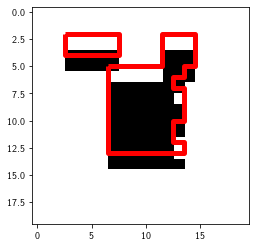

In [48]:
def plot_world_outlines_(bool_img, ax=None, offs=[.5,.5],**kwargs):
    if ax is None:
        ax = plt.gca()
    else:
        ax = ax
    offs = offs
    ij_boundary = get_all_boundary_edges(bool_img=bool_img)
    xy_boundary = ij_boundary - offs
    xy_boundary = close_loop_boundary_edges(xy_boundary=xy_boundary)
    cl = LineCollection(xy_boundary,**kwargs)
#     cl.set_offsets( (0., 1))
    ax.add_collection(cl)


array = np.zeros((20, 20))
array[4:6, 3:8] = 1
array[4:7, 12:15] = 1
array[7:15, 7:14] = 1
array[12:14, 13:14] = 0
array[8:9, 13:14] = 0


plt.figure()
plt.imshow(array, cmap='binary')
plot_world_outlines_(array.T,ax=None,offs = (.5,2.), lw=5, color='r')

### Forced model response has been calculated for each model and is accessible as numpy arrays

In [49]:
ls data/*fmr.npy

data/ACCESS1.3_fmr.npy      data/MIROC5_fmr.npy
data/CNRM-CM5_fmr.npy       data/MRI-CGCM3_fmr.npy
data/CSIRO-Mk3-6-0_fmr.npy  data/NorESM1-ME_fmr.npy
data/CanESM2_fmr.npy        data/inmcm4_fmr.npy
data/IPSL-CM5A-MR_fmr.npy


In [50]:
'''
Import forced model response data for different GCMs.
Binarize data in terms of whether there is a projected increase or decrease in heavy precipitation per degree warming.
Resize arrays onto a common grid (180 x 360). Performs quick sanity check at end.
'''
 
fmr_arrays = glob.glob("data/*fmr.npy")

boolean_arrays = np.empty(shape=(180,360,len(fmr_arrays)))

for ix, model in enumerate(fmr_arrays):

    boolean_arrays[:,:,ix] = (
        skimage.transform.resize(           # resize all arrays onto a common grid
        np.where(np.load(model)>0, 1,0.),  # binarize model data {-1|1}
        (180,360),                          # size of new grid
        order = 0)                          # Nearest neighbour interpolation
        ).astype(int)                       # Convert dtype using astype
    
for x in range(len(fmr_arrays)):
    print("Everything looks good here" if set(np.ravel(boolean_arrays[:,:,x])) == {1.0, 0.0} else "Problem here") # Sanity check

Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here
Everything looks good here


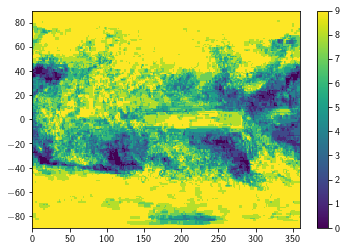

In [51]:
''' Add values of all arrays '''
sum_array = abs(np.sum(boolean_arrays, axis = 2))
rs_lats = np.linspace(-90,90,180)
rs_lons = np.linspace(0, 360, 360)
plt.pcolormesh(rs_lons, rs_lats, sum_array)
plt.colorbar()
plt.show()

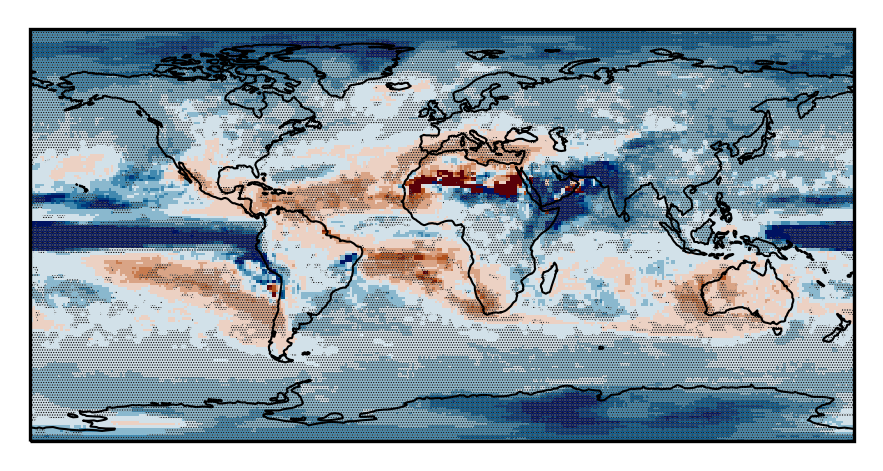

In [52]:
resized_arrays = np.empty(shape=(180,360,len(fmr_arrays)))

for ix, model in enumerate(fmr_arrays):
    a = np.load(model)
    resized_arrays[:,:,ix] = (skimage.transform.resize(a, (180,360), order = 0)).astype(int)
model_mean = np.mean(resized_arrays, axis = 2)

''' Grid  cells where 7 or more models agree '''
matched_array = np.where(abs(sum_array-4.5)>2, 1,0)

fig = plt.figure(1, figsize=(mm2inch(90,90)), frameon=True, dpi=300)
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax1.coastlines(resolution='110m', color='k', linewidth=0.5, zorder = 9)

plt.pcolormesh(
    rs_lons, rs_lats, model_mean,
    cmap = seg_cmap, norm=norm,
               transform = ccrs.PlateCarree(),vmin = -18, vmax=18)

plt.rcParams['hatch.color'] ="w"
plt.rcParams['hatch.linewidth'] = 0.5
C = ma.masked_where(matched_array == 0, matched_array)
plt.contourf(rs_lons, rs_lats, C,
             hatches =[20*'.',None], alpha=0.,transform = ccrs.PlateCarree())
plt.rcParams['hatch.color'] ="k"
plt.rcParams['hatch.linewidth'] = 0.2
plt.contourf(rs_lons, rs_lats, C,
             hatches =[20*'.',None], alpha=0.,transform = ccrs.PlateCarree())
plt.show()
speak("Resized arrays plotted")
fig

In [53]:
''' lat/lon points where models agree '''
stipple_points = []
for i, lat in enumerate(rs_lats):
    for j, lon in enumerate(rs_lons[:-1]):
        if matched_array[i,j] == 1:
            stipple_points.append(tuple([lon, lat]))

In [54]:
''' colours for matching points '''
stipple_colors = []
for i, lat in enumerate(rs_lats):
    for j, lon in enumerate(rs_lons[:-1]):
        if matched_array[i,j] == 1:
            if model_mean[i,j] >= 0:
                stipple_colors.append(vik_map_r(255))
            else:
                stipple_colors.append(vik_map_r(0))

In [55]:
''' Print percentage agreement beween models '''
size = 1
for dim in np.shape(matched_array): size *= dim
print("Global FMR sign agreement (7/9 models): {:.2f} %".format(len(stipple_points)/size*100))

Global FMR sign agreement (7/9 models): 73.45 %


In [56]:
''' Create list of longitudes offset by 180 degrees '''
lons_360 = []
for lon in locations.lons:
    if lon <0:
        lons_360.append(360+lon)
    else:
        lons_360.append(lon)

In [57]:
''' relocate volcanoes acccording to offset '''
relocated = []
i_reloc =[]
j_reloc =[]

for i, lat in enumerate(locations.lats):
    i_reloc.append(min(rs_lats, key=lambda x:abs(x-lat)))  
for j, lon in enumerate(lons_360):
    j_reloc.append(min(rs_lons, key=lambda x:abs(x-lon)))
relocated= list(zip(j_reloc, i_reloc))
assert len(locations) == len(relocated)

### Determine how many volcanoes rainfall will increase, decrcease, or if there is insufficient model agreement

In [58]:
volcano_colors = []
volc_wetter = 0
volc_drier = 0
volc_ambig = 0
fmr_val = []
fmr = []
for tup in relocated:
    i = list(rs_lats).index(tup[1])
    j = list(rs_lons).index(tup[0])
    fmr_val.append(model_mean[i,j])
    if matched_array[i,j] == 1:
        if model_mean[i,j] >= 0:
            volcano_colors.append(vik_map_r(255))
            volc_wetter+=1
            fmr.append('pos')
        else:
            volcano_colors.append(vik_map_r(0))
            volc_drier+=1
            fmr.append('neg')
    else:
        volcano_colors.append("grey")
        volc_ambig+=1
        fmr.append('amb')
# print(len(volcano_colors))
print("wetter: {} ({:.0f} %); drier: {} ({:.0f} %); ambiguous {} ({:.0f} %)".format(volc_wetter, 
                                                                                    (volc_wetter/len(volcano_colors))*100,
                                                                                    volc_drier,
                                                                                    (volc_drier/len(volcano_colors))*100,
                                                                                    volc_ambig,
                                                                                   (volc_ambig/len(volcano_colors))*100,))
print("{} volcanoes".format(sum([volc_wetter, volc_drier, volc_ambig])))

wetter: 707 (58 %); drier: 111 (9 %); ambiguous 399 (33 %)
1217 volcanoes


In [59]:
'''Update locations dataframe'''
locations["relocated"] = relocated
locations["FMR"] = fmr
locations["FMR_val"] = fmr_val
locations.head()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

lats   lons                       name  number  \
0  50.170   6.85  West Eifel Volcanic Field  210010   
1  45.775   2.97            Chaine des Puys  210020   
2  42.170   2.53        Olot Volcanic Field  210030   
3  38.870  -4.02   Calatrava Volcanic Field  210040   
4  42.600  11.93                    Vulsini  211003   

                                  relocated  FMR   FMR_val  
0  (7.0194986072423395, 49.776536312849174)  pos  3.555556  
1   (3.0083565459610027, 45.75418994413408)  pos  1.666667  
2   (3.0083565459610027, 41.73184357541899)  neg -2.444444  
3   (355.98885793871864, 38.71508379888269)  neg -5.000000  
4    (12.03342618384401, 42.73743016759778)  neg -1.666667

In [60]:
'''
Top n volcanoes sorted by FMR value (values above 0 only)
'''
n = 5
locations[locations.FMR=="pos"].nlargest(n, "FMR_val")

lats   lons                  name  number  \
151   19.80  18.53           Koussi, Emi  225021   
150   21.03  16.45       Tousside, Tarso  225010   
152   20.92  17.28           Voon, Tarso  225020   
1081  -0.88 -89.50  San Cristobal 353120  353120   
164   23.08  39.78         Rahat, Harrat  231070   

                                     relocated  FMR       FMR_val  
151   (18.050139275766014, 19.608938547486034)  pos  16787.888889  
150   (16.044568245125348, 20.614525139664806)  pos    975.333333  
152    (17.04735376044568, 20.614525139664806)  pos    970.444444  
1081  (270.7520891364902, -0.5027932960893793)  pos     46.000000  
164    (40.11142061281337, 22.625698324022352)  pos     45.111111

In [61]:
'''
Separate volcanoes according to their forced model response
'''
fmr_pos = locations[locations["FMR"] == "pos"].name.reset_index()
fmr_neg = locations[locations["FMR"] == "neg"].name.reset_index()
fmr_amb = locations[locations["FMR"] == "amb"].name.reset_index()
fmr_pos.head()

index                       name
0      0  West Eifel Volcanic Field
1      1            Chaine des Puys
2     40             Tair, Jebel at
3     41                      Zukur
4     42                     Hanish

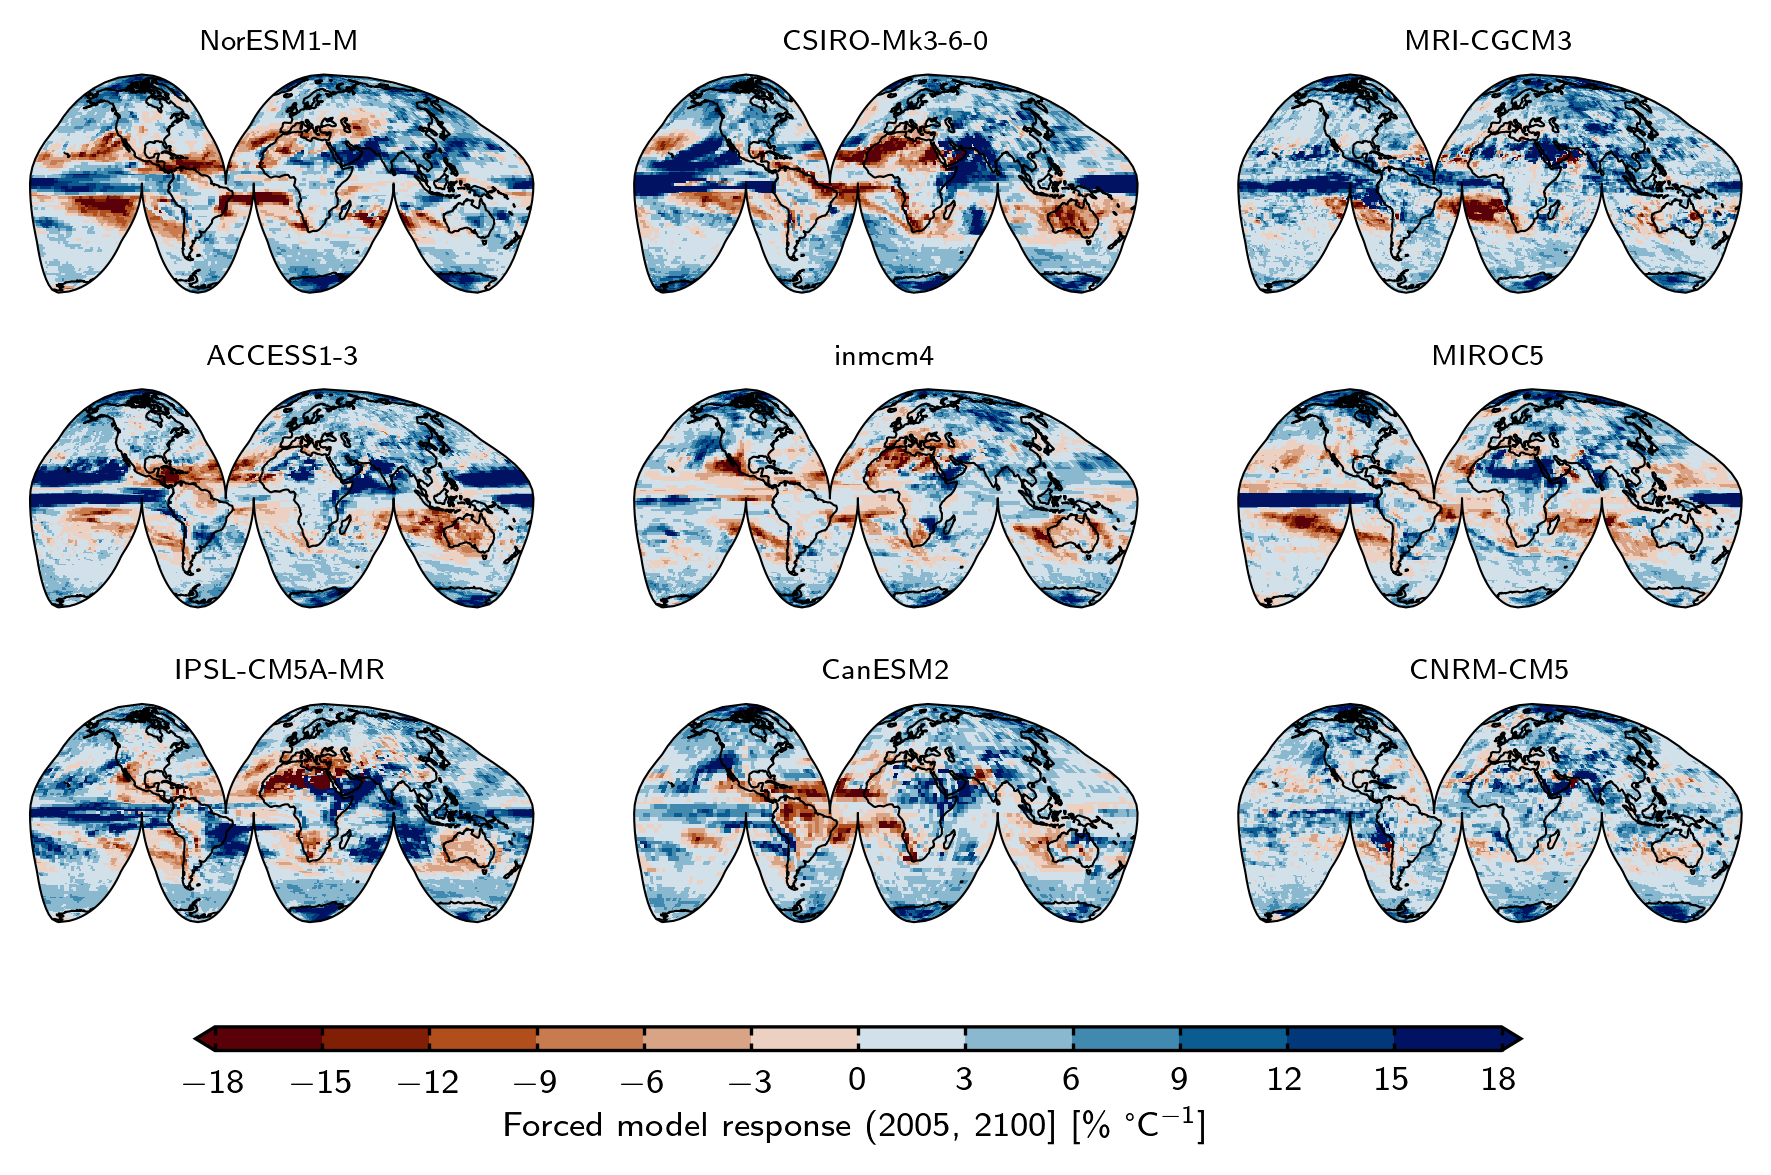

In [62]:
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(187,100)), frameon=True, dpi=300)
gs = plt.GridSpec(3, 3, figure=fig, wspace=0, hspace=0
                 )

axs = [fig.add_subplot((gs[0,0])),
       fig.add_subplot((gs[0,1])),
       fig.add_subplot((gs[0,2])),
       fig.add_subplot((gs[1,0])),
       fig.add_subplot((gs[1,1])),
       fig.add_subplot((gs[1,2])),
       fig.add_subplot((gs[2,0])),
       fig.add_subplot((gs[2,1])),
       fig.add_subplot((gs[2,2])),
      ]
for n in range(9):
    axs[n] = plt.subplot(3, 3, n+1,
                         projection=ccrs.InterruptedGoodeHomolosine(central_longitude=0))
    

for n in range(9):
    im = axs[n].pcolormesh(rs_lons, rs_lats,
                           resized_arrays[:,:,n],
                     cmap = seg_cmap, norm=norm,
               transform = ccrs.PlateCarree(),vmin = -18, vmax=18)
    axs[n].coastlines(resolution='110m', color='k', linewidth=0.5, zorder = 11)
    axs[n].outline_patch.set_linewidth(0.5)
    axs[n].outline_patch.set_zorder(50)
    axs[n].set_title(fileNameCodes[0][n], fontsize = "x-small")

cax = plt.axes([0.2, 0.035, 0.6, 0.02])
cbar = plt.colorbar(im,cax=cax,orientation='horizontal',
                       extend = "both",extendfrac = .015, shrink = 1,pad = .5,
                    ticks = np.arange(-18,19,3))

cbar.ax.set_ylabel(r"Forced model response (2005, 2100] [\% {{\textdegree}}C$^{-1}$]", rotation=0, fontsize = "small")
cbar.ax.yaxis.set_label_coords(0.5,-4)#1.5)
cbar.ax.tick_params(labelsize="small", direction = "in", length = 2)
cbar.ax.xaxis.set_ticks_position('both')
plt.savefig("climate_figures/ext_data_fig1.png", bbox_inches="tight")
plt.savefig("climate_figures/ext_data_fig1.pdf", bbox_inches="tight")
plt.show()
speak("Models plotted")
fig

#### Extended Data Figure 1 | Forced model response for all compared models.
GCM codes (as listed in Table 1, Methods) are shown above the corresponding map. Forced model response (FMR) as  _RX_ versus 〈_T_〉 over the timeframe from 2005 or 2006 to 2100, normalised to 2006. Blue tones represent an increase in extreme rainfall with increased global warming, red tones represent a decrease.

In [63]:
'''Create dictionary of descriptive stats for different volcano sets'''
pos_fmr_vals = [x for x in locations[locations["FMR"] == "pos"].FMR_val.values]
log_vals = [np.log10(x) for x in pos_fmr_vals] # 'pos' data is lognormal
log_vals = [x for x in log_vals if not math.isinf(x)]
dist_dict = {}
dist_dict["pos"] = (10**np.nanmean(log_vals),\
10**(np.nanmean(log_vals)+(2*np.nanstd(log_vals))),\
10**(np.nanmean(log_vals)-(2*np.nanstd(log_vals)))
)
for v in ["amb", "neg"]:
    vals = [x for x in locations[locations["FMR"] == v].FMR_val.values if x>-1000] #ignore spuriously low values
    mean = np.nanmean(vals)
    std1 = mean+(2*np.nanstd(vals))
    std2 = mean-(2*np.nanstd(vals))
    dist_dict[v] = (mean, std2, std1)


In [64]:
def plot_FMR_distributions(axis):
    bins_list = np.linspace(-10,42,50)
    y_val = [200,210,210]
    ax = axis
    for i,f in enumerate(sorted(set(locations["FMR"]))):
        subset = locations[locations["FMR"] == f]
        ax.hist(subset.FMR_val, bins = bins_list, density = False, histtype = "stepfilled",
                 ec = ["k", "firebrick","midnightblue"][i],
                 fc = ["k", "firebrick","midnightblue"][i],alpha = 0.65, lw =.5,
               label = r"{}{}".format(f, ["iguous", "ative", "itive"][i]))# zorder = 4-i)

        ax.hlines(y=y_val[i], xmin=dist_dict[f][1], xmax=dist_dict[f][2],
              color = ["k", "firebrick","midnightblue"][i], lw =.5)
        ax.vlines(x=dist_dict[f][0], ymin=y_val[i]-8, ymax=y_val[i]+8,
              color = ["k", "firebrick","midnightblue"][i], lw =.5)
    for spine in ["top", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(-10,40)
    ax.set_xticks([-10,0,10,20,30,40])
    ax.set_ylim(0,220)
    ax.yaxis.tick_right()

    ax.spines["right"].set_position(("data", 30))
    ax.set_yticks([100,200])
    ax.legend(fancybox = False, frameon = False,
               markerscale= 1,fontsize = "x-small", 
              bbox_to_anchor=(.45, .8), loc=2,
              handletextpad=.3,
              ncol = 1)
#     ax.set_xlabel(r"Mean FMR (2005, 2100] [\% K$^{-1}$]", fontsize = "small")
    ax.set_xlabel(r"Mean FMR (2005, 2100] [\% {{\textdegree}}C$^{-1}$]", fontsize = "small")



In [65]:
def plot_FMR_globe(axis):

    ax1 = axis
    ax1.coastlines(resolution='50m', color='w', linewidth=1, zorder = 9)
    ax1.coastlines(resolution='50m', color='k', linewidth=0.5, zorder = 9)
    im =ax1.pcolormesh(
        rs_lons, rs_lats, model_mean,
        cmap=vik_map_r,
                   transform = ccrs.PlateCarree(),vmin = -21, vmax=21)

    
    blank = ma.masked_where(matched_array == 1, matched_array)
    ax1.contourf(rs_lons, rs_lats, blank,
                 hatches =[15*'.',None], alpha=0.,transform = ccrs.PlateCarree()) #20*'.'

    plot_world_outlines_(C.T,offs=(0,90.5),ax = axis,lw=.25, color='k',transform = ccrs.PlateCarree())
    ax1.outline_patch.set_linewidth(0.5)
    return im

# plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


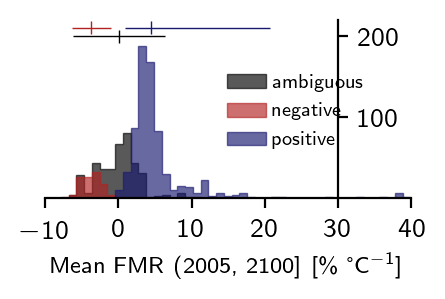

In [66]:
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(60,30)), frameon=True, dpi=200)
ax = fig.add_subplot(111)
plot_FMR_distributions(axis=ax)

In [67]:
if os.getcwd() != filepath:
    %cd $filepath

[Errno 2] No such file or directory: '/Users/jamiefarquharson/Documents/GitHub/rainfall-in-volcanic-regions/Projects/Climate_forcing'
/Users/jamiefarquharson/Documents/GitHub/rainfall-in-volcanic-regions


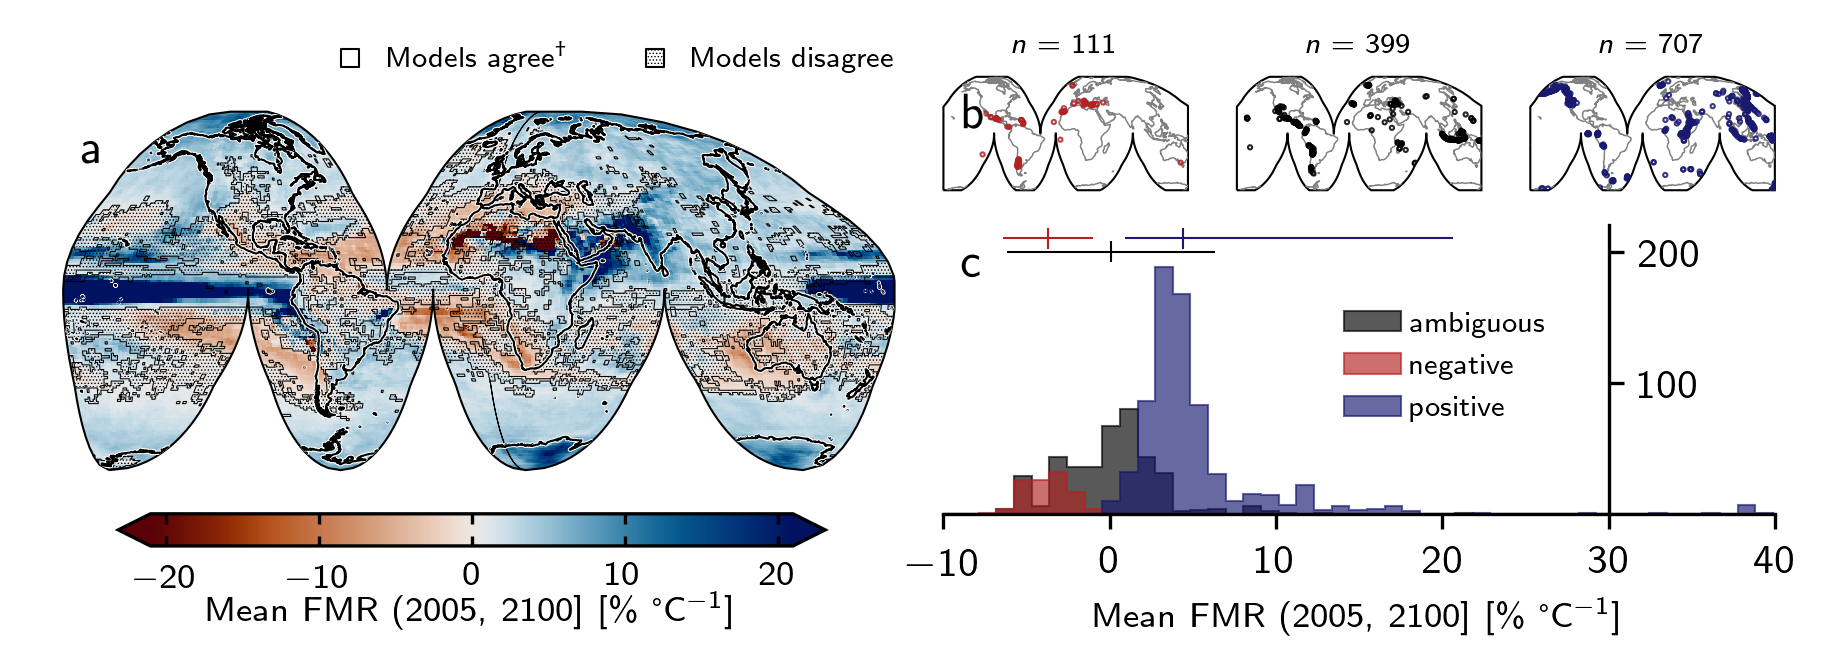

In [68]:
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(187,50)), frameon=True, dpi=300)
IGH = ccrs.InterruptedGoodeHomolosine(central_longitude=0)
axs = [plt.subplot2grid((3,6), (0,3), rowspan=1, colspan=1, fig=fig,projection=IGH),
plt.subplot2grid((3,6), (0,4), rowspan=1, colspan=1, fig=fig,projection=IGH),
plt.subplot2grid((3,6), (0,5), rowspan=1, colspan=1, fig=fig,projection=IGH),
plt.subplot2grid((3,6), (0,0), rowspan=3, colspan=3, fig=fig,projection=IGH),
plt.subplot2grid((3,6), (1,3), rowspan=2, colspan=3, fig=fig)]
plot_FMR_distributions(axis=axs[-1])

for ix, lst in enumerate([fmr_neg.name, fmr_amb.name, fmr_pos.name]):
    vset = list(lst)
    set_lons = locations[locations.name.isin(vset)].lons.values
    set_lats = locations[locations.name.isin(vset)].lats.values
    axis = axs[ix]
    axis.coastlines(resolution='110m', color='grey', linewidth=0.35, zorder = 9)
    axis.outline_patch.set_linewidth(0.5)
    axis.outline_patch.set_edgecolor("k")
    axis.scatter(set_lons,set_lats, marker = "o",
                 color = 'None', ec =['firebrick','k','midnightblue'][ix],
                    s = 1, transform = ccrs.PlateCarree(), lw = .5, zorder = 20, alpha = .85)
    axis.set_extent([-180,180,-80,80], ccrs.PlateCarree())
    axis.set_title(r"$n$ = {}".format(len(vset)),fontsize = "x-small")
im = plot_FMR_globe(axis=axs[3])
cax = fig.add_axes([0.11, 0.05, 0.4, 0.5])
cax.axis('off')
cbar = fig.colorbar(im,ax=cax,orientation='horizontal', extend = "both",
                    shrink = 0.8, ticks = [-20, -10, 0, 10, 20], )#pad = .1)
# cbar.ax.set_ylabel(r"Mean FMR (2005, 2100] [\% K$^{-1}$]", rotation=0, fontsize = "small")
cbar.ax.set_ylabel(r"Mean FMR (2005, 2100] [\% {{\textdegree}}C$^{-1}$]", rotation=0, fontsize = "small")

cbar.ax.yaxis.set_label_coords(0.5,-2.6)
cbar.ax.tick_params(labelsize="small", direction = "in", length = 2.5)
cbar.ax.xaxis.set_ticks_position('both')
axs[1].tick_params(labelsize="small")
for ix, axis in enumerate([-2,0,-1]):
    axs[axis].annotate(STRING.ascii_lowercase[ix],**labelArgs, **labelKwargs)
    
plt.scatter([],[],marker = "s",s=300,lw=.5,ec = "k", color= "none", label = r"Models agree$^{{\dagger}}$")
plt.scatter([],[],marker = "s",hatch =15*'.',
            s=300,lw=.5,ec = "k", color= "none", label = "Models disagree")
plt.legend(fancybox = False, frameon = False,
               markerscale= .25,fontsize = "x-small", 
           bbox_to_anchor=(.3, 2), loc=6,
              handletextpad=.3,
              ncol = 2)

plt.savefig("climate_figures/figure_2.png", bbox_inches="tight")
plt.savefig("climate_figures/figure_2.pdf", bbox_inches="tight")
plt.show()
speak("Figure plotted")
fig

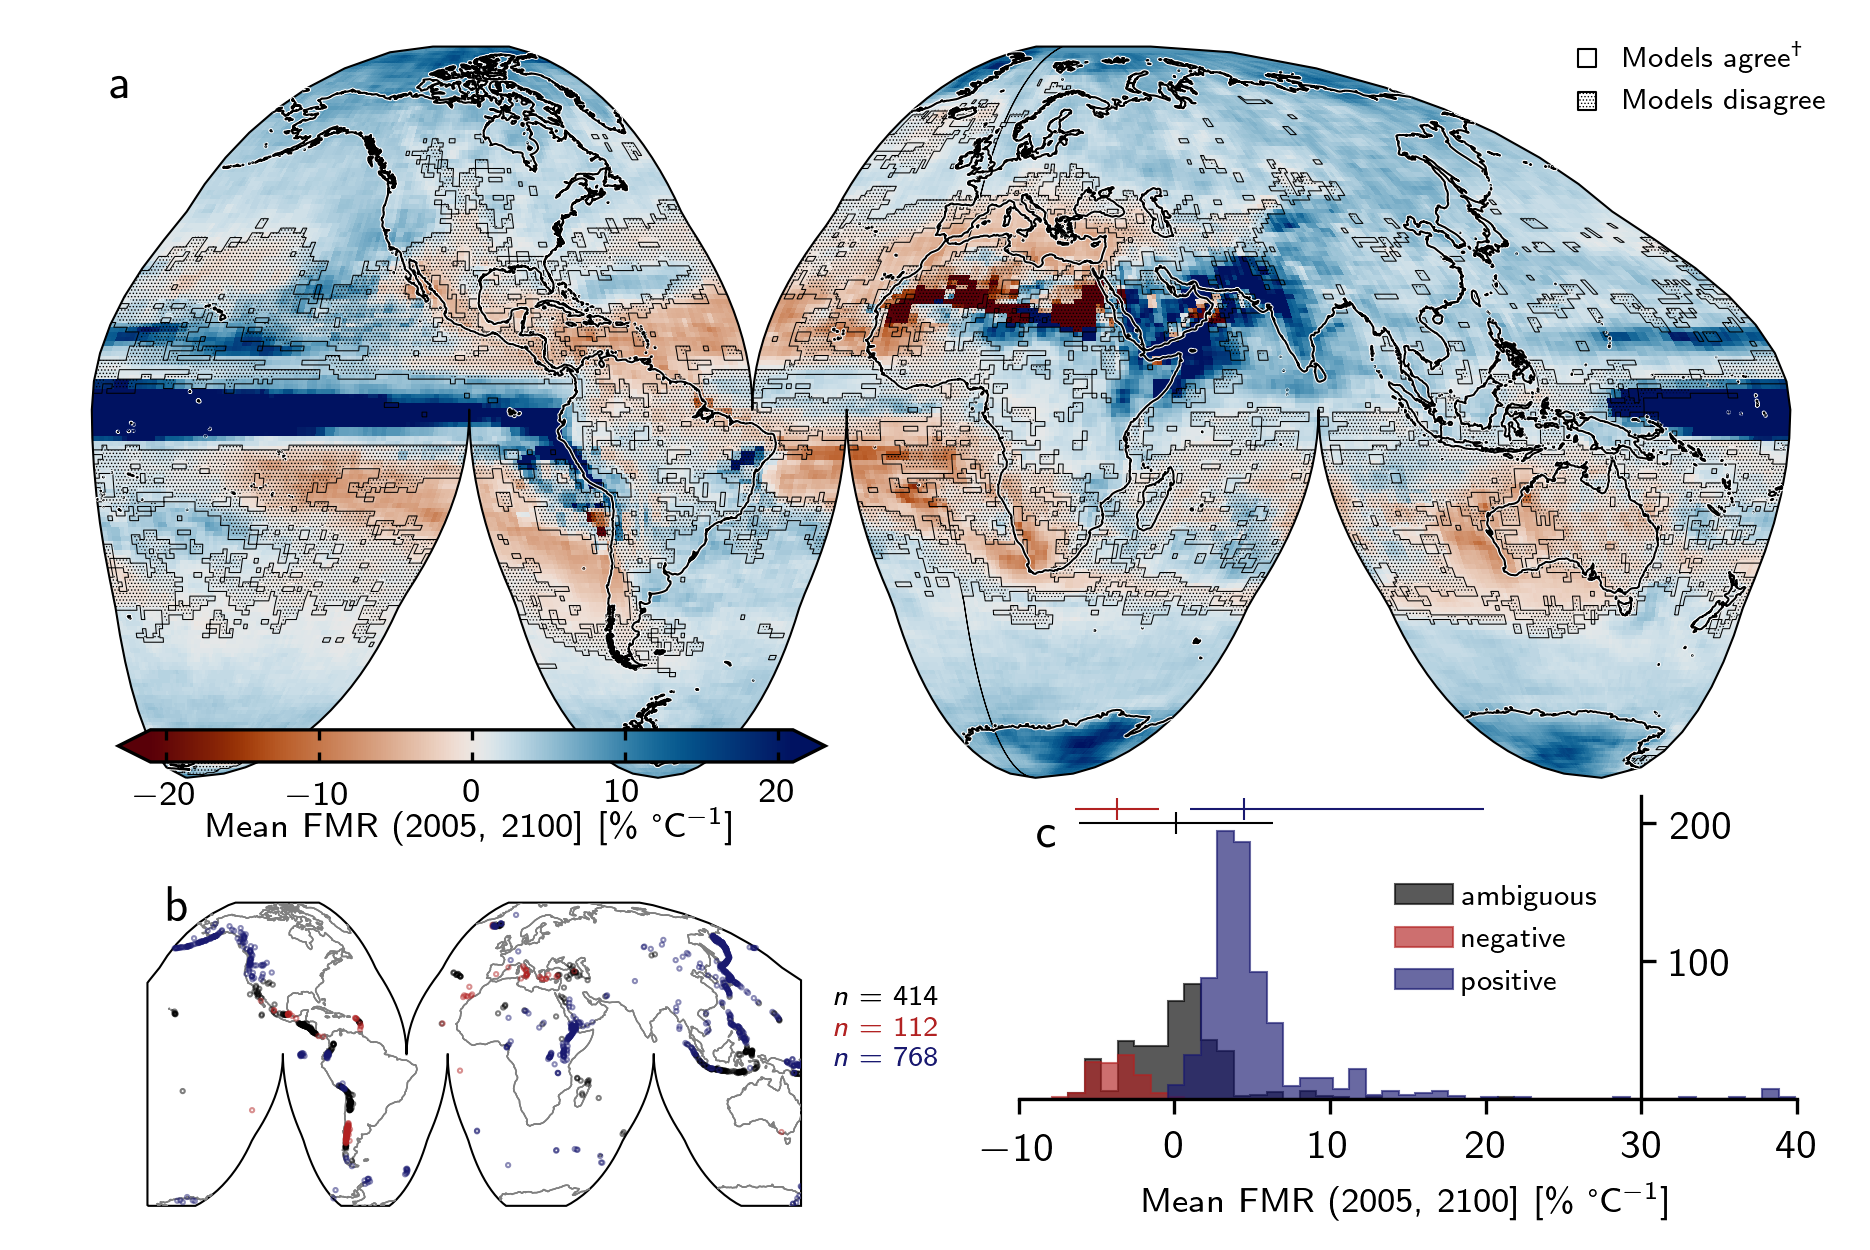

In [174]:
fig = plt.figure(1, figsize=(mm2inch(187,130)), frameon=True, dpi=300)
IGH = ccrs.InterruptedGoodeHomolosine(central_longitude=0)
axs = [
    plt.subplot2grid((11,2), (0,0),rowspan=7, colspan=2, fig=fig,projection=IGH),
    plt.subplot2grid((11,2), (8,0),rowspan=3, colspan=1, fig=fig,projection=IGH),
    plt.subplot2grid((11,2), (7,1),rowspan=3, colspan=1, fig=fig),
]
plot_FMR_distributions(axis=axs[-1])

for ix, lst in enumerate([fmr_amb.name, fmr_neg.name, fmr_pos.name]):
    vset = list(lst)
    set_lons = locations[locations.name.isin(vset)].lons.values
    set_lats = locations[locations.name.isin(vset)].lats.values
    axis = axs[1]
    axis.coastlines(resolution='110m', color='grey', linewidth=0.35, zorder = 9)
    axis.outline_patch.set_linewidth(0.5)
    axis.outline_patch.set_edgecolor("k")
    axis.scatter(set_lons,set_lats, marker = "o",
                 color = 'None', ec =['k','firebrick','midnightblue'][ix],
                    s = 1, transform = ccrs.PlateCarree(), lw = .5, zorder = 20, alpha = .5)
    axis.set_extent([-180,180,-80,80], ccrs.PlateCarree())
    axis.annotate(r"$n$ = {}".format(len(vset)),
                  xy = (1.05,.5-(ix/10)), xycoords = "axes fraction",
                  xytext = (0,12), textcoords = "offset points",
                  color =['k','firebrick','midnightblue'][ix],
                  fontsize = "x-small")
    
im = plot_FMR_globe(axis=axs[0])
cax = fig.add_axes([0.1, .36, 0.4, 0.5])
cax.axis('off')
cbar = fig.colorbar(im,ax=cax,orientation='horizontal', extend = "both",
                    shrink = 0.8, ticks = [-20, -10, 0, 10, 20], )
cbar.ax.set_ylabel(r"Mean FMR (2005, 2100] [\% {{\textdegree}}C$^{-1}$]", rotation=0, fontsize = "small")
cbar.ax.yaxis.set_label_coords(0.5,-2.6)
cbar.ax.tick_params(labelsize="small", direction = "in", length = 2.5)
cbar.ax.xaxis.set_ticks_position('both')
axs[1].tick_params(labelsize="small")


labelArgs = {'xy': (0, 1),'xytext': (4,-4),
            'xycoords':'axes fraction',
            'textcoords':'offset points',}

axs[0].annotate("a",
                       **labelArgs, **labelKwargs)
axs[1].annotate("b",
                       **{'xy': (0, 1),'xytext': (4,4),
            'xycoords':'axes fraction',
            'textcoords':'offset points',}, **labelKwargs)
axs[-1].annotate("c",
                       **labelArgs, **labelKwargs)
plt.scatter([],[],marker = "s",s=300,lw=.5,ec = "k", color= "none", label = r"Models agree$^{{\dagger}}$")
plt.scatter([],[],marker = "s",hatch =15*'.',
            s=300,lw=.5,ec = "k", color= "none", label = "Models disagree")
plt.legend(fancybox = False, frameon = False,
               markerscale= .25,fontsize = "x-small", 
              bbox_to_anchor=(1.7, 1), loc=6,
              handletextpad=.3,
              ncol = 1)
plt.show()

#### Figure 2 | Breakdown of mean forced model response.
**a** Global mean forced model response (FMR) calculated from all models. Shaded area indicates those regions where fewer than seven of nine models agreed on the sign of change (26.55 %).

**b** Subaerial volcano geolocations separated according to whether models agree on a decrease in heavy precipitation with increased warming (red: “neg”); the precipitation response is ambiguous due to lack of model agreement (black: “amb”); models agree on an increase in heavy precipitation with increased warming (blue: “pos”). _n_ indicates the number of discrete Holocene-active volcanic systems in each category. 

**c** Histogram of mean FMR for each group of volcanoes (as in __b__). Mean and two standard deviation range are indicated (Methods). 


In [69]:
def plot_FMR_single(volcano, axis, num=9, regression = True):
    ax = axis
    volcano = volcano
    for i in range(num):
        try:
            gmt, gmt_df = global_mean_temp(fileNameCodes[0][i], method = "max", verbose=False)

            lat, lon = model_lalo(parameter="pr", modelName=fileNameCodes[0][i])
            i_volc, j_volc = volcano_ij(volcano = volcano, lats = lat, lons = lon, verbose = False)
            rx_df, rx = heavy_rainfall(i_volc, j_volc, modelName=fileNameCodes[0][i], method = "max", verbose = False)

            rolling_T = gmt.temp.rolling(30, min_periods =10).mean()
            rolling_rx = rx.rainfall.rolling(30, min_periods=10).mean()
            rT = [x-rolling_T[-80] for x in rolling_T if not math.isnan(x)]
            rR = [((x-rolling_rx[-80])/rolling_rx[-80])*100 for x in rolling_rx if not math.isnan(x)]
            ax.plot(rT, 
             rR, # 65 = len(datset) - window
    # lw = .8, 
                     label = fileNameCodes[0][i],color= inferno(x2clr(i,9)), lw=.5, alpha=.85
        )
    #         rT = [x for x in rolling_T]
    #         rR = [x for x in rolling_rx]
            if regression != False:
                coef = np.polyfit(rT,rR,1)
                poly1d_fn = np.poly1d(coef) 
                # poly1d_fn is now a function which takes in x and returns an estimate for y

                ax.plot(rT, poly1d_fn(rT), '--k', lw = .5, zorder = np.inf)
        except:
            print("issue with {}".format(fileNameCodes[0][i]))
            continue
# plt.legend()
    ax.axhline(0, lw=.5, color = "grey", zorder = 0)
    ax.axvline(0, lw=.5, color = "grey", zorder = 0)
    ax.set_title(string_rearranger(volcano), fontsize ="x-small")
    ax.set_xlim(-1.5,5.5)
    ax.set_ylim(-17,37)#32
#     ax.xticks([0,2,4])
    ax.minorticks_on()
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='both', labelsize="small")
# plt.ylabel("Change in heavy\nprecipitation [\%]")


In [70]:
def plot_FMR_list(volcanoList, axis,region="", num=9,save_gradient=False, regression=True):
    ax = axis
    vol_list = volcanoList
    gradientList = []
    for i in range(num):
        try:
            gmt, gmt_df = global_mean_temp(fileNameCodes[0][i], method = "max", verbose=False)
            av_rx_df, av_rx = heavy_rainfall_area(vol_list, \
                                         modelName=fileNameCodes[0][i], method = "max", verbose = False)
            rolling_av_rx = av_rx.rainfall.rolling(30, min_periods = 10).mean()

            rolling_T = gmt.temp.rolling(30, min_periods =10).mean()

            rT = [x-rolling_T[-80] for x in rolling_T if not math.isnan(x)]
            raR = [((x-rolling_av_rx[-80])/rolling_av_rx[-80])*100 for x in rolling_av_rx if not math.isnan(x)]
        
            ax.plot(rT, 
             raR, # 65 = len(datset) - window
    # lw = .8, 
                     label = fileNameCodes[0][i],color= inferno(x2clr(i,9)), lw=.5, alpha=.85
        )
            if regression != False:

                coef = np.polyfit(rT,raR,1)
                poly1d_fn = np.poly1d(coef) 
                # poly1d_fn is now a function which takes in x and returns an estimate for y

                ax.plot(rT, poly1d_fn(rT), '--k', lw = .5, zorder = np.inf)
            if save_gradient == True:
                gradientList.append(coef[0])
        except:
            print("issue with {}".format(fileNameCodes[0][i]))
            continue
# plt.legend()
    ax.axhline(0, lw=.5, color = "grey", zorder = 0)
    ax.axvline(0, lw=.5, color = "grey", zorder = 0)
    ax.set_title(region, fontsize ="x-small")
    ax.set_xlim(-1.5,5.5)
    ax.set_ylim(-17,37)
    plt.xticks([0,2,4])
    ax.minorticks_on()
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='both', labelsize="small")
    if save_gradient == True:
        return gradientList
# plt.ylabel("Change in heavy\nprecipitation [\%]")


In [71]:
def get_vals(countList, chi2=False):
    from collections import Counter
    from scipy.stats import chisquare
    countr = Counter(sorted(countList))
    for key in range(10):
        if key not in countr:
            countr[key]=0
    if chi2==True:
        print(chisquare(list(countr.values())))
    labels, values = zip(*sorted(countr.items()))
    vals=[x for x in values]
    vals[:0] = [vals[0]]
    vals.append(vals[-1])
    return labels, vals

In [72]:
def plot_count_list(countList, axis,label, xLabel=False):
    ax = axis
    labels, vals = get_vals(countList, chi2=False)
    label_array = np.array(labels)
    width = 1
    indexes=np.arange(-.5,11,1)
    
    ax.step(indexes,vals, color="k", lw=.5, where = "pre")
    ax.fill_between(indexes[-5::],vals[-5::], step="pre", alpha=0.65,lw=.5,
                     color="midnightblue")
    ax.fill_between(indexes[3:-4],vals[3:-4], step="pre", alpha=0.65,lw=.5,
                     color="k")
    ax.fill_between(indexes[0:4],vals[0:4], step="pre", alpha=0.65,lw=.5,
                     color="firebrick")
    ax.set_xlim(-.5,9.5)
    ax.set_ylim(ymin=0, ymax = vals[-1]*1.25)
    ax.set_xticks(label_array-.5 + width * 0.5, labels)
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    if xLabel == True:
        ax.set_xlabel("Number of models projecting positive FMR", fontsize="small")
    ax.spines["top"].set_visible(False)
    ax.spines['right'].set_bounds(0,vals[-1])
    arrowz = {'arrowstyle': '-', 'lw':.5, 'shrinkA':0,'shrinkB':0}
    ax.annotate('majority', xy=(9.5,vals[-1]*1.2), xytext=(4.5,vals[-1]*1.2), arrowprops=arrowz,
               fontsize="x-small", ha="right", va="center")
    ax.annotate('significant majority', xy=(9.5,vals[-1]*1.05), xytext=(6.5,vals[-1]*1.05), arrowprops=arrowz,
               fontsize="x-small", ha="right", va="center")
    ax.annotate(r"{}; $n$ = {}".format(label,sum(vals[1:-1])),xy=(.05,.5),xycoords="axes fraction", fontsize="small")

In [73]:
def plot_volcano_single(volcano, axis):
    name_volc = volcano
    ax1 = axis
    lat_volc = volcano_set.loc[[name_volc]].lat.values[0]
    lon_volc = volcano_set.loc[[name_volc]].lon.values[0]




    ax1.coastlines(resolution='110m', color='black', linewidth=0.5)
    # ax1.stock_img()

    plt.scatter(lon_volc, lat_volc, color ='r',
                marker = 's', alpha = 1, edgecolor = 'k', s = 25, linewidths = 0.5,
                zorder = 999,transform = ccrs.PlateCarree())
    # ax1.set_extent([-122.25,-121.75,46,46.5])
    offset = 30
    ax1.set_extent([lon_volc-offset/2,lon_volc+offset/2,lat_volc-offset, lat_volc+offset])
    ytk = np.round(lat_volc/10)*10
    xtk = np.round(lon_volc/10)*10
    # ax1.set_xticks([-122], crs=ccrs.PlateCarree())
    ax1.set_xticks([xtk], crs=ccrs.PlateCarree())
    ax1.set_yticks([ytk-10,ytk,ytk+10], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.tick_params(axis='both', which='major', labelsize="xx-small", direction="in")

In [74]:
def get_regional_outlines_(listOfVolcanoes):
    modelFile = netCDF4.MFDataset(list_of_models(parameter="pr", modelName=fileNameCodes[0][0]))
    startString = modelFile.variables["time"].units.split()[2] # Days since XXX date
    start = datetime.strptime(startString, "%Y-%m-%d")
    time = [start+timedelta(int(x)) for x in modelFile.variables["time"][:]]

    lat_vals = modelFile.variables["lat"][:]
    lon_vals = modelFile.variables["lon"][:]
    vol_list  = []
  
    tup_list = volcano_list_ij(volcanoList=listOfVolcanoes, lats=lat_vals, lons=lon_vals)

    row  = [int(np.where(lat_vals == x[0])[0]) for x in tup_list]
    col  = [int(np.where(lon_vals == x[1])[0]) for x in tup_list]
    data = PRCP[row,col]
    coo = sparse.coo_matrix((data, (row, col)), shape=PRCP.shape)
    
#     masked_PRCP = np.where(coo.todense() >0, coo.todense(), np.nan)
    masked_PRCP = np.where(coo.toarray() >0, 1, np.nan)
    
    bool_PRCP = np.where(coo.toarray() >0, 1,0)
    return masked_PRCP, bool_PRCP

In [96]:
def PRCP():
    modelFile = netCDF4.MFDataset(list_of_models(parameter="pr", modelName=fileNameCodes[0][0]))
    PRCP = modelFile.variables["pr"][0,:,:]
    modelFile.close()
    return PRCP
PRCP = PRCP()
    

In [78]:
def return_FMR_list(volcanoList, num=9,save_gradient=True):

    vol_list = volcanoList
    gradientList = []
    for i in range(num):
        try:
            gmt, gmt_df = global_mean_temp(fileNameCodes[0][i], method = "max", verbose=False)
            av_rx_df, av_rx = heavy_rainfall_area(vol_list, \
                                         modelName=fileNameCodes[0][i], method = "max", verbose = False)
            rolling_av_rx = av_rx.rainfall.rolling(30, min_periods = 10).mean()

            rolling_T = gmt.temp.rolling(30, min_periods =10).mean()

            rT = [x-rolling_T[-80] for x in rolling_T if not math.isnan(x)]
            raR = [((x-rolling_av_rx[-80])/rolling_av_rx[-80])*100 for x in rolling_av_rx if not math.isnan(x)]
        

            coef = np.polyfit(rT,raR,1)
            poly1d_fn = np.poly1d(coef)

#             ax.plot(rT, poly1d_fn(rT), '--k', lw = .5, zorder = np.inf)
            if save_gradient == True:
                gradientList.append(coef[0])
        except:
            print("issue with {}".format(fileNameCodes[0][i]))
            continue

    if save_gradient == True:
        return gradientList

#### Compiling spatially averaged FMR gradients for all regions and subregions for each model can take upwards of an hour on a 2.8 GHz Quad-Core Intel Core i7 MacBook Pro.

Alternatively, this cell can be skipped, and the regionalGradients and subregionalGradients dicts read directly from the respective pickle files. 

In [106]:
%%time
''' Uncomment if dicts should be created'''
# regionalGradients = {}

# for ix, region in enumerate(set(volcano_list.Region)):
#     vol_list  = []
#     subset = volcano_list[volcano_list.Region == region]
#     vol_list = list(subset["Volcano_Name"].values)
#     gradients = return_FMR_list(vol_list, num=9, save_gradient=True)    
#     regionalGradients[region] = gradients
#     print('{:02d}% | '.format(int((ix+1)/len(set(volcano_list.Region))*100)), sep=' ', end=' ', flush=True)

# time.sleep(.5)
# speak("Program complete")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


' Uncomment if dicts should be created'

In [80]:
''' Uncomment if dicts should be read from pickle'''
# regionalGradients = pd.read_pickle(r'data/regionalGradients.pkl')

In [108]:
%%time
''' Uncomment if dicts should be created'''
# subregionalGradients = {}

# for ix, region in enumerate(set(volcano_list.Subregion)):
#     vol_list  = []
#     subset = volcano_list[volcano_list.Subregion == region]
#     vol_list = list(subset["Volcano_Name"].values)
#     gradients = return_FMR_list(vol_list, num=9, save_gradient=True)    
#     subregionalGradients[region] = gradients
#     print('{:02d}% | '.format(int((ix+1)/len(set(volcano_list.Subregion))*100)), sep=' ', end=' ', flush=True)

# time.sleep(.5)
# speak("Program complete")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


' Uncomment if dicts should be created'

In [81]:
''' Uncomment if dicts should be read from pickle'''
# subregionalGradients = pd.read_pickle(r'data/subregionalGradients.pkl')

In [82]:
''' Distinguish models that yield positive FMR results'''
region_pos_counts = []
for region in regionalGradients.keys():
    only_pos = [num for num in regionalGradients[region] if num > 0]
    pos_count = len(only_pos) 
    region_pos_counts.append(pos_count)
    
subregion_pos_counts = []
for region in subregionalGradients.keys():
    only_pos = [num for num in subregionalGradients[region] if num > 0]
    pos_count = len(only_pos) 
    subregion_pos_counts.append(pos_count)

In [83]:
def plot_count_list_(axis, xLabel=False):
    ax = axis
    labels, vals = get_vals(countList=region_pos_counts, chi2=False)
    *_, sub_vals = get_vals(countList=subregion_pos_counts, chi2=False)
    label_array = np.array(labels)
    width = 1
    indexes=np.arange(-.5,11,1)
    
    ax.step(indexes,vals, color="k", lw=.5, where = "pre")
    ax.step(indexes,sub_vals, color="k", lw=.5, where = "pre")
    ax.fill_between(indexes,vals, step="pre", alpha=0.65,lw=.5,
                     color="k")
    ax.set_xlim(-.5,9.5)
    ax.set_ylim(ymin=0, ymax = sub_vals[-1]+2)
    ax.set_xticks(label_array-.5 + width * 0.5, labels)
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0,5,10,15,20,25])
    if xLabel == True:
        ax.set_xlabel("Number of models projecting positive FMR", fontsize="small")
    ax.spines["top"].set_visible(False)
    ax.spines['right'].set_bounds(0,sub_vals[-1])
    arrowz = {'arrowstyle': '-', 'lw':.5, 'shrinkA':0,'shrinkB':0}
    ax.annotate('subregional data', xy=(indexes[4]-.5,sub_vals[4]),
                xytext=(0,14),textcoords="offset points", arrowprops=arrowz,
               fontsize="small", ha="center", va="center")
    ax.annotate('regional data', xy=(8.5,5), xytext=(-8,0),textcoords="offset points", arrowprops=arrowz,
               fontsize="small", ha="right", va="center")
    ax.vlines(6.5, 17, 27, color = "grey", lw=.5)
    ax.hlines(27, 6.5, 9.5, color = "grey", lw=.5)
    ax.vlines(4.5, 17, 28, color = "grey", lw=.5, ls="--")
    ax.hlines(28, 4.5, 9.5, color = "grey", lw=.5, ls="--")


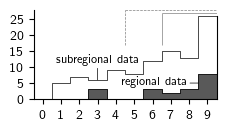

In [84]:
fig = plt.figure(1, mm2inch(60,30), dpi=100)
ax=fig.add_subplot(111)
plot_count_list_(ax)

In [85]:
'''
Sort regions according to the lowest value in the respective FMR distribution
'''
srtd = sorted(regionalGradients.items(), key=lambda e: sorted(e[1])[0])
srtd_ = sorted(subregionalGradients.items(), key=lambda e: sorted(e[1])[0])

[s[0] for s in srtd]

['Melanesia and Australia',
 'Philippines and SE Asia',
 'Kuril Islands',
 'Indonesia',
 'Middle East and Indian Ocean',
 'Japan, Taiwan, Marianas',
 'New Zealand to Fiji',
 'Hawaii and Pacific Ocean',
 'South America',
 'Kamchatka and Mainland Asia',
 'Mediterranean and Western Asia',
 'Africa and Red Sea',
 'West Indies',
 'Iceland and Arctic Ocean',
 'Canada and Western USA',
 'México and Central America',
 'Atlantic Ocean',
 'Alaska',
 'Antarctica']

In [86]:
def gradientKDE(data, bins, density = True):
    ''' Return a kernel density estimate of input data'''
    from scipy import stats
    h,e = np.histogram(data, bins = bins, density=density)
    x = np.linspace(e.min(), e.max(),100)

    kde = stats.gaussian_kde(data)
    return x, kde.pdf(x)

#### Unknown Pleasures plot: pretty but useless

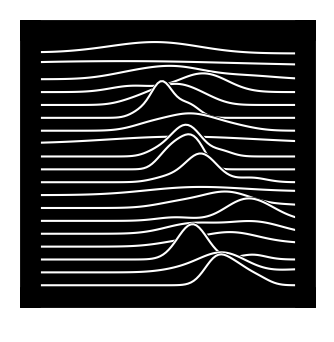

In [87]:
fig = plt.figure(1, figsize=(mm2inch(30,30)), frameon=True, dpi=300)

ax=fig.add_subplot(111)
for i, region in enumerate([s[0] for s in srtd]):
    x, kdex = gradientKDE(data = regionalGradients[region],
                         bins = np.linspace(-12,12,24),
                          density=True)
    ax.fill_between(x,y1= kdex-.1*i,y2=-.1*i, color="k",
                    zorder=(2*i)-1, alpha = 1.)
    ax.plot(x, kdex-.1*i, lw=.5,color="w", zorder=2*i)
ax.set_xlim([-12,12])
ax.set_facecolor("k")
ax.set_xticklabels([])
ax.set_xticks([])
ax.tick_params(labelbottom=False)
ax.tick_params(labelleft=False) 
ax.tick_params(left= False)
[ax.spines[k].set_linewidth(5) for k in ax.spines.keys()]
[ax.spines[k].set_zorder(np.inf) for k in ax.spines.keys()]
plt.show()

In [88]:
def plot_north_pole(axis):
    import matplotlib.path as mpath
    import cartopy.feature as cfeature
    ax1 = axis
    resol = '50m'
    ax1.coastlines(resolution=resol, color='k', linewidth=0.2, zorder = 9)
    regionList = [s[0] for s in srtd]#list(set(volcano_list.Region))
    
    land = cfeature.NaturalEarthFeature('physical', 'land', \
        scale=resol, edgecolor='none', facecolor="gainsboro")
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor="w")
    
    for ix, region in enumerate(regionList):
        try:
            subset = volcano_list[volcano_list.Region == region]
        except:
            subset = volcano_list[volcano_list.Subregion == region]
        if region == "Iceland and Arctic Ocean":
            vol_list = list(subset["Volcano_Name"].values)
            mask_A, bool_A = get_regional_outlines_(vol_list)
            cmap = matplotlib.colors.ListedColormap([roma_map(x2clr(ix,19)),'None'])
            ax1.imshow(mask_A, cmap=cmap,alpha = .95, transform = ccrs.PlateCarree(), zorder=np.inf)
    ax1.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
    ax1.add_feature(land, zorder=3)
    ax1.add_feature(ocean, zorder=1)
#     ax1.add_feature(cfeature.LAND, color ="gainsboro", zorder=3)
#     ax1.add_feature(cfeature.OCEAN, color ="darkgrey", zorder=1)
    gl = ax1.gridlines(draw_labels=False, xlocs=None, ylocs=None,
                      linewidth=.25, color='black', 
    alpha=0.5, linestyle='--', zorder = 2)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.56
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)
    gl.n_steps = 90 ## adjust gridline resolution
    ax1.outline_patch.set_linewidth(.5)
    ax1.outline_patch.set_zorder(np.inf)

In [89]:
def plot_south_pole(axis):
    import matplotlib.path as mpath
    import cartopy.feature as cfeature
    resol = '50m'
    ax1 = axis
    ax1.coastlines(resolution=resol, color="k", linewidth=0.2, zorder = 9)
    regionList = [s[0] for s in srtd]#list(set(volcano_list.Region))
    land = cfeature.NaturalEarthFeature('physical', 'land', \
        scale=resol, edgecolor='none', facecolor="gainsboro")
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor="w")
    for ix, region in enumerate(regionList):
        try:
            subset = volcano_list[volcano_list.Region == region]
        except:
            subset = volcano_list[volcano_list.Subregion == region]
        vol_list = list(subset["Volcano_Name"].values)
        mask_A, bool_A = get_regional_outlines_(vol_list)
        cmap = matplotlib.colors.ListedColormap([roma_map(x2clr(ix,19)),'None'])
        ax1.imshow(mask_A, cmap=cmap,alpha = .95, transform = ccrs.PlateCarree(), zorder=np.inf)
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

#     ax1.add_feature(cfeature.LAND, color ="gainsboro", zorder=1)
#     ax1.add_feature(cfeature.OCEAN, color ="k", zorder=1)
    ax1.add_feature(land, zorder=3)
    ax1.add_feature(ocean, zorder=1)
    gl = ax1.gridlines(draw_labels=False, xlocs=None, ylocs=None,
                      linewidth=.25, color='k', 
    alpha=.5, linestyle='--', zorder = 2)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.56
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax1.set_boundary(circle, transform=ax1.transAxes)
    gl.n_steps = 90 ## adjust gridline resolution
    ax1.outline_patch.set_linewidth(.5)
    ax1.outline_patch.set_zorder(np.inf)

In [90]:
def plot_region_map(axis, regionList = False):
    ax1 = axis
    
    resol = '50m'
    ax1 = axis
    ax1.coastlines(resolution=resol, color="k", linewidth=0.2, zorder = 9)
    regionList = [s[0] for s in srtd]#list(set(volcano_list.Region))
    land = cfeature.NaturalEarthFeature('physical', 'land', \
        scale=resol, edgecolor='none', facecolor="gainsboro")
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor="w")
    if regionList != False:
        regionList = regionList
    else:
        regionList = list(set(volcano_list.Region))
    for ix, region in enumerate(regionList):
        try:
            subset = volcano_list[volcano_list.Region == region]
        except:
            subset = volcano_list[volcano_list.Subregion == region]
        vol_list = list(subset["Volcano_Name"].values)
        mask_A, bool_A = get_regional_outlines_(vol_list)
        cmap = matplotlib.colors.ListedColormap([roma_map(x2clr(ix,19)),'None'])
        ax1.imshow(mask_A, cmap=cmap, transform = ccrs.PlateCarree(), zorder=999)#np.inf)
    ax1.set_extent([-180,180,-65,65], ccrs.PlateCarree())
#     ax1.add_feature(cfeature.LAND, color ="gainsboro", zorder=1)
    ax1.add_feature(land, zorder=3)
    ax1.add_feature(ocean, zorder=1)
    gl = ax1.gridlines(draw_labels=False, xlocs=None, ylocs=None,
                          linewidth=.25, color='black', 
    alpha=0.5, linestyle='--', zorder = 2)
    ax1.outline_patch.set_linewidth(.5)
    ax1.outline_patch.set_zorder(np.inf)

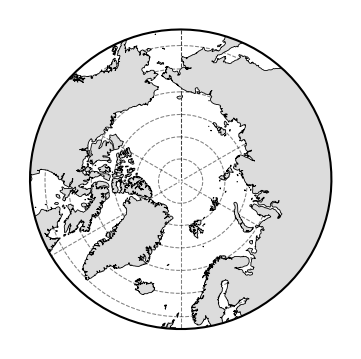

In [97]:
fig = plt.figure(1, figsize=(mm2inch(30,30)), frameon=True, dpi=300)
ax = fig.add_subplot(111,
                     projection=ccrs.NorthPolarStereo(central_longitude=0))
plot_north_pole(axis = ax)
speak("Plotted")

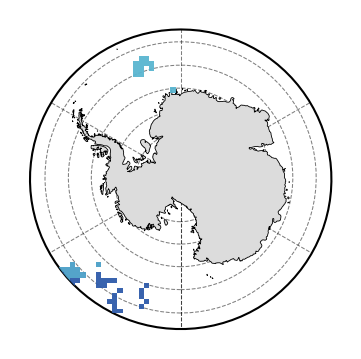

In [98]:
fig = plt.figure(1, figsize=(mm2inch(30,30)), frameon=True, dpi=300)
ax = fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
plot_south_pole(axis = ax)
speak("Plotted")

In [99]:
def shuffle_axis(axis, offset=[0,0,1,1]):
    axis = axis
    pos1 = axis.get_position() # get the original position 
    pos2 = [pos1.x0 + offset[0], pos1.y0 + offset[1],\
                 pos1.width * offset[2], pos1.height * offset[3]] 
    axis.set_position(pos2) # set a new position

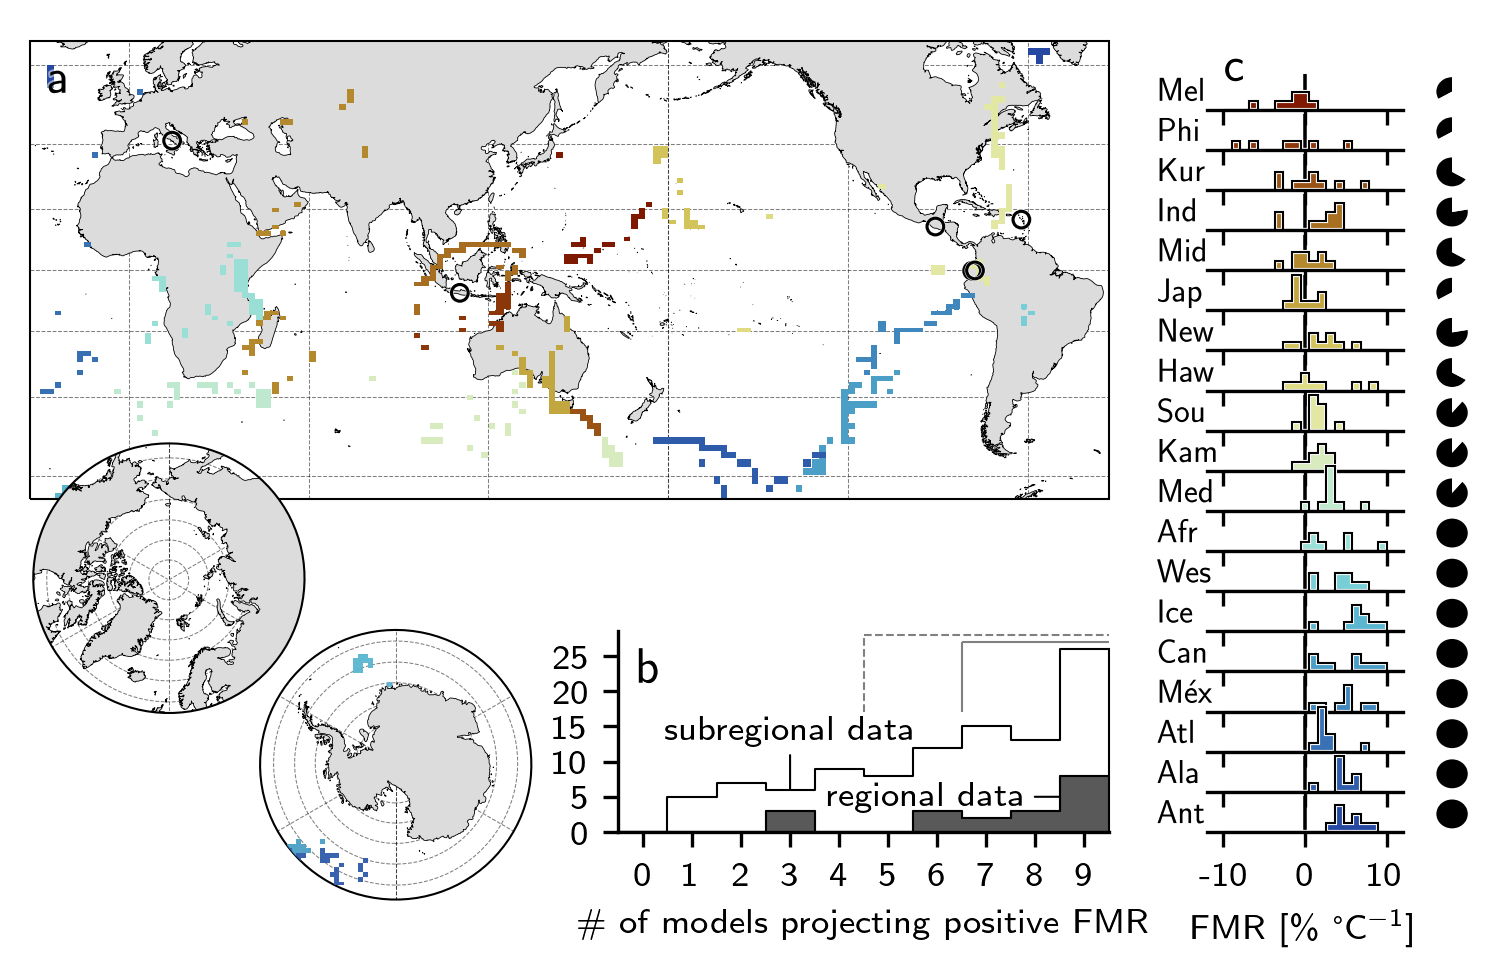

In [100]:
numAxes = 19
fig = plt.figure(1, figsize=(mm2inch(150,90)), frameon=True, dpi=300)
gs = plt.GridSpec(numAxes, 5, figure = fig, wspace = 0.5, hspace = -.5)
axs = []
for n in range(numAxes):
    axs.append(fig.add_subplot((gs[n,-1])))
axs.append(fig.add_subplot((gs[0:-8,0:-1]),projection=ccrs.Miller(central_longitude=147)))
axs.append(fig.add_subplot((gs[-7:-2,0:2]),projection=ccrs.NorthPolarStereo()))
axs.append(fig.add_subplot((gs[-5::,0:3]),projection=ccrs.SouthPolarStereo()))
axs.append(fig.add_subplot((gs[-4:,0:2])))
axs.append(fig.add_subplot((gs[-4:,2:4])))
plot_count_list_(axis=axs[-1])
axs[-1].set_xticks(np.arange(0,10,1))
# plot_count_list(countList = subregion_pos_counts, axis=axs[-1], label = "Subregion")

    
for i, region in enumerate([s[0] for s in srtd]):#regionalGradients.keys()):
    axs[i].hist(regionalGradients[region], bins = np.linspace(-10,10, 20),
                            density = False, histtype = "stepfilled", ec ="w",fc=roma_map(x2clr(i,19)),
                alpha= 1,lw = 1.)
    axs[i].hist(regionalGradients[region], bins = np.linspace(-10,10, 20),
                            density = False, histtype = "step", lw=.5,ec ="k")#roma_map(x2clr(i,19)))
#     x, kdex = gradientKDE(data = regionalGradients[region],
#                          bins = np.linspace(-12,12,24),
#                           density=True)

#     axs[i].plot(x, kdex*9, lw=1.,color="w", zorder =20)
#     axs[i].plot(x, kdex*9, lw=.5,color="k", zorder =20)
    

    axs[i].vlines(0,ymin=0,ymax=4, lw=.85, color="k",zorder=0)
    axs[i].set_ylim([0,9])#.5
    axs[i].set_xlim([-12,12])
    axs[i].set_facecolor("None")
    axs[i].set_xticklabels([])
    axs[i].set_xticks([-10,0,10])
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["left"].set_visible(False)
    axs[i].tick_params(labelbottom=False)
    axs[i].tick_params(labelleft=False) 
    axs[i].tick_params(left= False)
    axs[i].vlines(0,0,0.25, lw=.8, color="k", zorder = 0)
    axs[i].annotate(region[0:3], xy = (-11,1), xytext=(-14,0),
                    textcoords = "offset points",
                    xycoords="data",
                    fontsize = 8, 
                    path_effects = buffer)
    only_pos = [num for num in regionalGradients[region] if num > 0]
    pos_count = len(only_pos) 
    sizes = [pos_count, 9-pos_count]
    axin = axs[i].inset_axes([1, 0, 0.5, .45])
    axin.axis('off')
    axin.pie(sizes, startangle=90, colors = [
        "k",
#         roma_map(x2clr(i,19)),
        "w"],)
axs[18].set_xlabel(r"FMR [\% {{\textdegree}}C$^{-1}$]", fontsize = "small")


axs[18].tick_params(labelbottom=True)
axs[18].set_xticklabels([-10,0,10])

for i in [18,-2,-1]:
    axs[i].tick_params(axis='both', labelsize="small")

plot_region_map(axis = axs[19])    
plot_north_pole(axis = axs[20])
plot_south_pole(axis = axs[21])
axs[-1].set_ylim(ymax=28.5)
axs[-1].spines["right"].set_linewidth(.5)
axs[-1].set_xlabel("\# of models projecting positive FMR", fontsize="small")
axs[-2].axis("Off")
for ix,i in enumerate([19,-1,0]):
    axs[i].annotate(STRING.ascii_lowercase[ix], xy=(0, 1),xytext=(4, -4),
                      xycoords='axes fraction',textcoords='offset points',
    color='k',fontsize = 12, path_effects = buffer,ha='left', va='top', zorder = np.inf)
axs[20].set_zorder(np.inf)

for name_volc in ["Guagua Pichincha","Reventador",\
                  "Soufriere Hills", "Vesuvius","Merapi",\
                 "Fuego"]:

    lat_volc = volcano_set.loc[[name_volc]].lat.values[0]
    lon_volc = volcano_set.loc[[name_volc]].lon.values[0]

    axs[19].scatter(lon_volc, lat_volc, color ='None',
                marker = 'o', alpha = 1, edgecolor = 'w', s = 16, linewidths = 1.,
                zorder = np.inf,transform = ccrs.PlateCarree())
    axs[19].scatter(lon_volc, lat_volc, color ='None',
                marker = 'o', alpha = 1, edgecolor = 'k', s = 16, linewidths = 0.75,
                zorder = np.inf,transform = ccrs.PlateCarree())

# Shuffle Polar axis a little    
shuffle_axis(axis=axs[20], offset=[-.06,.05,1,1])
shuffle_axis(axis=axs[21], offset=[-.015,-.05,1,1])


plt.savefig("climate_figures/figure_3.png", bbox_inches="tight")
plt.savefig("climate_figures/figure_3.pdf", bbox_inches="tight")
speak("Figure plotted")

#### Figure 3 | Regional and sub-regional spatial averages.
**a** Map indicating the noncontiguous spatial extent over which regional data are averaged. Circle markers indicate individual volcanoes shown in Figure 4. [Inset] polar regions. 

**b** Bar chart of the number of regions and subregions where x number of models project a spatially averaged forced model response (FMR) > 0 (i.e. a concomitant increase in heavy precipitation and global mean temperature). Dashed bracket indicates the majority of models, solid bracket indicates 7 or more out of 9 models.

**c** Inter-model distributions of calculated FMR for each region.  Marginal pie charts indicate the proportion of models that project a positive FMR per region (out of maximum of nine).

__Table 1| Model analysis results.__

Abbreviation corresponds to the three-letter code on **Figure 3**. _n_ is the number of historically active volcanoes within the region. Mean and median FMR values are given, along with standard deviation from the mean. “min” and “max” refer to the minimum and maximum calculated values of FMr for each region. “# +ve” refers to the number of models (out of nine) that yield a positive FMR value (see **Figure 3c**).

In [129]:
''' Table '''
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
col8 = []
col9 = []

for i in range(len(srtd)):
    region = srtd[i][0]
    vals = regionalGradients[region]
    col1.append(region[0:3])
    col2.append(region)
    col3.append(len(volcano_list[volcano_list["Region"] == region]))
    col4.append(round(np.mean(vals),2))
    col5.append(round(np.std(vals),2))
    col6.append(round(np.median(vals),2))
    col7.append(round(min(vals),2))
    col8.append(round(max(vals),2))
    col9.append(len([num for num in regionalGradients[region] if num > 0]))

top_headers = ["Region"]    
headers = ["Abbr", "Name", "$n$", "Mean", "StD", "Median", "Min", "Max", "No. +ve"]

table = pd.DataFrame(list(zip(col1,col2,col3,col4, col5, col6, col7, col8,col9)), columns = headers)
table.style.hide_index()

format_dict = {"$n$": "{0:,.0f}", "Mean" : "{0:,.2f}",
               "StD" : "{0:,.2f}", "Median": "{0:,.2f}",
               "Min": "{0:,.2f}", "Max": "{0:,.2f}",
               "No. +ve": "{0:,.0f}"}
table.style.format(format_dict).hide_index()

CPU times: user 5min 49s, sys: 2min 25s, total: 8min 14s
Wall time: 9min 4s


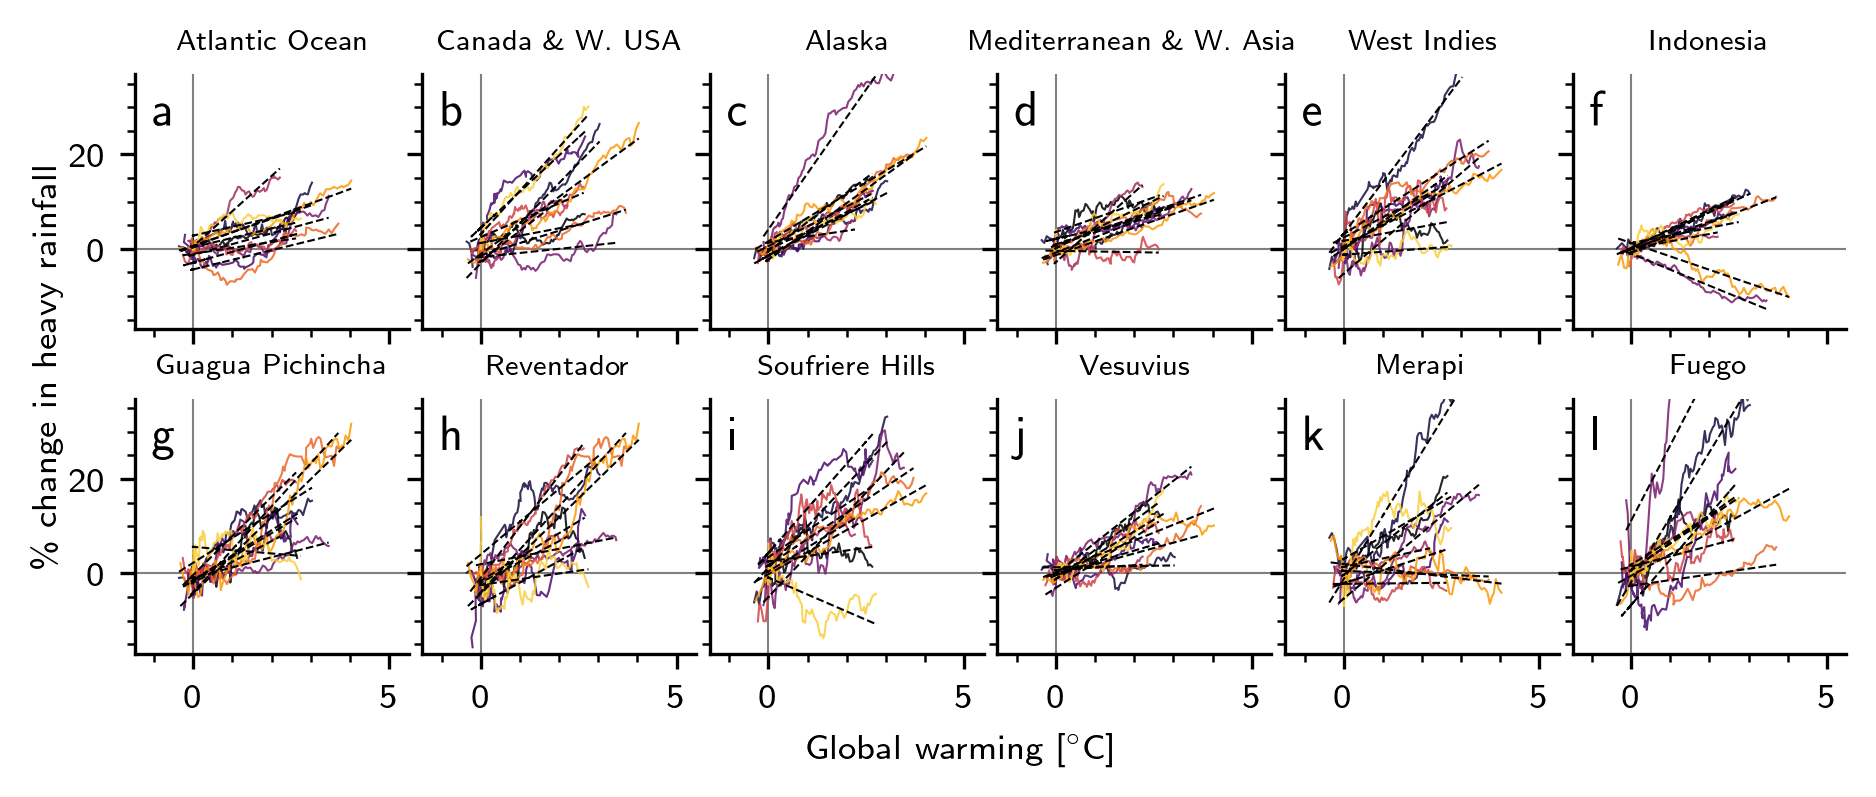

In [126]:
%%time
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(187,65)), frameon=True, dpi=300)

gs = plt.GridSpec(4, 6, figure=fig, wspace=.05, hspace=.75
                 )

axs = [fig.add_subplot((gs[0:2,0])),
       fig.add_subplot((gs[0:2,1])),
       fig.add_subplot((gs[0:2,2])),
       fig.add_subplot((gs[0:2,3])),
       fig.add_subplot((gs[0:2,4])),
       fig.add_subplot((gs[0:2,5])),
       
       fig.add_subplot((gs[2:4,0])),
       fig.add_subplot((gs[2:4,1])),
       fig.add_subplot((gs[2:4,2])),
       fig.add_subplot((gs[2:4,3])),
       fig.add_subplot((gs[2:4,4])),
       fig.add_subplot((gs[2:4,5])),

      ]
for num, label in enumerate(STRING.ascii_lowercase[0:12]):
    axs[num].annotate(label, **labelArgs,**labelKwargs)
vol_list  = []
for ix, region in enumerate(['Atlantic Ocean','Canada and Western USA',\
                             'Alaska', "Mediterranean and Western Asia",\
                             'West Indies', 'Indonesia']): #Honshu
    subset = volcano_list[volcano_list.Region == region]
    vol_list = list(subset["Volcano_Name"].values)
    plot_FMR_list(vol_list, axis=axs[ix], region=region,num=9)
    os.system("printf '\7'")
axs[1].set_title("Canada \& W. USA ", fontsize ="x-small")
axs[3].set_title("Mediterranean \& W. Asia ", fontsize ="x-small")

    
for ix, volc in enumerate(["Guagua Pichincha","Reventador",\
                          "Soufriere Hills","Vesuvius",\
                          "Merapi", "Fuego"]):
    plot_FMR_single(volcano=volc, axis = axs[ix+6])
    os.system("printf '\7'")
for i in range(12):
    if not i in [0,6]:
        axs[i].set_yticklabels([])
    if i <6:
        axs[i].set_xticklabels([])
axs[-1].set_xticks([0,5])
fig.text(0.085,.5,"\% change in heavy rainfall",  rotation = 90, fontsize = "small", va = "center", ha = "center")
fig.text(0.5,0,r"Global warming [$^{\circ}$C]",  fontsize = "small", va = "center", ha = "center")
plt.savefig("climate_figures/fig4.png", bbox_inches="tight")
plt.savefig("climate_figures/fig4.pdf", bbox_inches="tight")
speak("figure plotted")

CPU times: user 6min 20s, sys: 2min 22s, total: 8min 42s
Wall time: 9min 38s


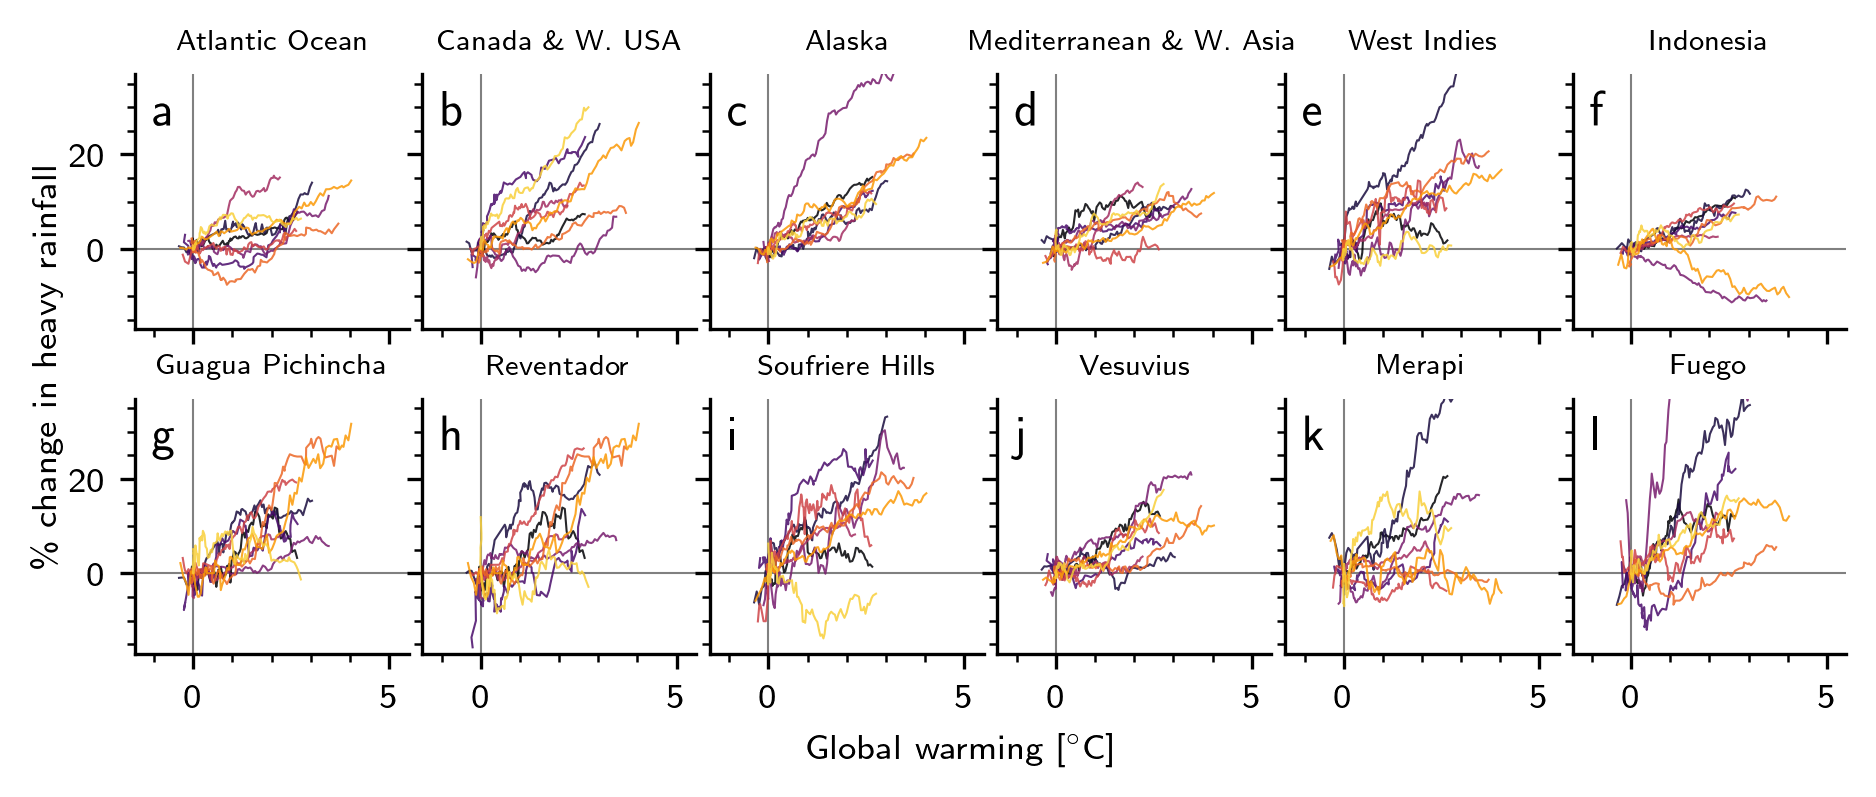

In [114]:
%%time
''' To plot without regression lines '''
call_plt_params()
fig = plt.figure(1, figsize=(mm2inch(187,65)), frameon=True, dpi=300)

gs = plt.GridSpec(4, 6, figure=fig, wspace=.05, hspace=.75
                 )

axs = [fig.add_subplot((gs[0:2,0])),
       fig.add_subplot((gs[0:2,1])),
       fig.add_subplot((gs[0:2,2])),
       fig.add_subplot((gs[0:2,3])),
       fig.add_subplot((gs[0:2,4])),
       fig.add_subplot((gs[0:2,5])),
       
       fig.add_subplot((gs[2:4,0])),
       fig.add_subplot((gs[2:4,1])),
       fig.add_subplot((gs[2:4,2])),
       fig.add_subplot((gs[2:4,3])),
       fig.add_subplot((gs[2:4,4])),
       fig.add_subplot((gs[2:4,5])),

      ]
for num, label in enumerate(STRING.ascii_lowercase[0:12]):
    axs[num].annotate(label, **labelArgs,**labelKwargs)
vol_list  = []
for ix, region in enumerate(['Atlantic Ocean','Canada and Western USA',\
                             'Alaska', "Mediterranean and Western Asia",\
                             'West Indies', 'Indonesia']): 
    subset = volcano_list[volcano_list.Region == region]
    vol_list = list(subset["Volcano_Name"].values)
    plot_FMR_list(vol_list, axis=axs[ix], region=region,num=9, regression = False)
    os.system("printf '\7'")
axs[1].set_title("Canada \& W. USA ", fontsize ="x-small")
axs[3].set_title("Mediterranean \& W. Asia ", fontsize ="x-small")

    
for ix, volc in enumerate(["Guagua Pichincha","Reventador",\
                          "Soufriere Hills","Vesuvius",\
                          "Merapi", "Fuego"]):
    plot_FMR_single(volcano=volc, axis = axs[ix+6], regression=False)
    os.system("printf '\7'")
for i in range(12):
    if not i in [0,6]:
        axs[i].set_yticklabels([])
    if i <6:
        axs[i].set_xticklabels([])
axs[-1].set_xticks([0,5])
fig.text(0.085,.5,"\% change in heavy rainfall",  rotation = 90, fontsize = "small", va = "center", ha = "center")
fig.text(0.5,0,r"Global warming [$^{\circ}$C]",  fontsize = "small", va = "center", ha = "center")
plt.savefig("climate_figures/figure_4_no_reg.png", bbox_inches="tight")
plt.savefig("climate_figures/figure_4_no_reg.pdf", bbox_inches="tight")
speak("figure plotted")

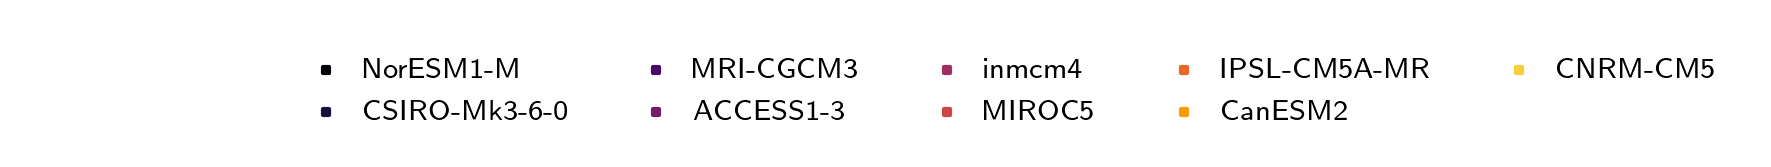

In [115]:
''' Figure legend '''
fig = plt.figure(1, mm2inch(187,10), dpi = 300)
ax = fig.add_subplot(111)
for i in range(9):
    
    plt.scatter([],[],marker = "s",color= inferno(x2clr(i,9)), label = fileNameCodes[0][i])
plt.legend(fancybox = False, frameon = False,
               markerscale= .25,fontsize = "x-small", 
#               bbox_to_anchor=(.5, .8), loc=2,
              handletextpad=.3,
              ncol = 5)
plt.xlim(0,1)
plt.ylim(0,1)
ax.axis("off")
plt.show()

#### Figure 4 | Forced model responses at different spatial scales.
**a-f** Percent change in modeled heavy rainfall per degree of global warming. Data are shown as a 30-yr rolling mean, normalised to January 2021. Dashed black lines are linear regression of response for each model. Data are areal averages (see Figure 3 for areal extent of each region).

**g-l** As __a–f__, for individual volcanic systems. Data correspond to the bounding pixel for each model (see Methods). Volcano locations are shown in Figure 3.



### Textual analysis of Smithsonian Institution Global Volcanism Program bulletin reports
https://volcano.si.edu/gvp_votw.cfm

In [129]:
cd data

/Users/jamiefarquharson/Documents/GitHub/rainfall-in-volcanic-regions/Projects/Climate_forcing/data


#### The following downloads 1000+ webpages to analyse. Alternatively, uncomment the cell below to unpack pages downloaded on March 11 2021.

In [156]:
# from shutil import unpack_archive
# unpack_archive(
#     filename='GVP_webpages_20210311.tar.gz', format="gztar"
# )
# unpack_archive(   
#     filename='GVP_webpages_20210311.zip', format="zip"
# )


In [134]:
'''
Generate 'rain_url.txt' file with list of urls required for data download.

This is to check GVP pages for mentions of defined strings 
'''
prefix = 'https://volcano.si.edu/volcano.cfm?vn='
string_list = [volcano_list[volcano_list.Volcano_Name == volcano].\
Volcano_Number.values[0] for volcano in list(set(locations.name))]

with open("rain_url.txt", "w") as output:
    for line in list([ prefix+str(x)+"\n" for x in string_list ]):
        output.write(str(line))
!wget -nv -i rain_url.txt -nc -c 
print('GVP pages retrieved')

2021-03-11 15:43:28 URL:https://volcano.si.edu/volcano.cfm?vn=327120 [41965/41965] -> "volcano.cfm?vn=327120" [1]
2021-03-11 15:43:29 URL:https://volcano.si.edu/volcano.cfm?vn=300600 [34754/34754] -> "volcano.cfm?vn=300600" [1]
2021-03-11 15:43:29 URL:https://volcano.si.edu/volcano.cfm?vn=312260 [82595/82595] -> "volcano.cfm?vn=312260" [1]
2021-03-11 15:43:30 URL:https://volcano.si.edu/volcano.cfm?vn=341031 [86338/86338] -> "volcano.cfm?vn=341031" [1]
2021-03-11 15:43:30 URL:https://volcano.si.edu/volcano.cfm?vn=357081 [32676/32676] -> "volcano.cfm?vn=357081" [1]
2021-03-11 15:43:30 URL:https://volcano.si.edu/volcano.cfm?vn=300410 [36735/36735] -> "volcano.cfm?vn=300410" [1]
2021-03-11 15:43:31 URL:https://volcano.si.edu/volcano.cfm?vn=390080 [64276/64276] -> "volcano.cfm?vn=390080" [1]
2021-03-11 15:43:31 URL:https://volcano.si.edu/volcano.cfm?vn=341094 [40769/40769] -> "volcano.cfm?vn=341094" [1]
2021-03-11 15:43:37 URL:https://volcano.si.edu/volcano.cfm?vn=311340 [80328/80328] -> "v

2021-03-11 15:44:26 URL:https://volcano.si.edu/volcano.cfm?vn=321020 [47597/47597] -> "volcano.cfm?vn=321020" [1]
2021-03-11 15:44:26 URL:https://volcano.si.edu/volcano.cfm?vn=243061 [33041/33041] -> "volcano.cfm?vn=243061" [1]
2021-03-11 15:44:26 URL:https://volcano.si.edu/volcano.cfm?vn=355094 [38651/38651] -> "volcano.cfm?vn=355094" [1]
2021-03-11 15:44:27 URL:https://volcano.si.edu/volcano.cfm?vn=343082 [38804/38804] -> "volcano.cfm?vn=343082" [1]
2021-03-11 15:44:27 URL:https://volcano.si.edu/volcano.cfm?vn=341007 [39642/39642] -> "volcano.cfm?vn=341007" [1]
2021-03-11 15:44:28 URL:https://volcano.si.edu/volcano.cfm?vn=300530 [35829/35829] -> "volcano.cfm?vn=300530" [1]
2021-03-11 15:44:28 URL:https://volcano.si.edu/volcano.cfm?vn=300320 [33330/33330] -> "volcano.cfm?vn=300320" [1]
2021-03-11 15:44:29 URL:https://volcano.si.edu/volcano.cfm?vn=354008 [36331/36331] -> "volcano.cfm?vn=354008" [1]
2021-03-11 15:44:31 URL:https://volcano.si.edu/volcano.cfm?vn=351080 [702146/702146] -> 

2021-03-11 15:45:38 URL:https://volcano.si.edu/volcano.cfm?vn=214070 [57244/57244] -> "volcano.cfm?vn=214070" [1]
2021-03-11 15:45:38 URL:https://volcano.si.edu/volcano.cfm?vn=265090 [70638/70638] -> "volcano.cfm?vn=265090" [1]
2021-03-11 15:45:40 URL:https://volcano.si.edu/volcano.cfm?vn=264260 [263535/263535] -> "volcano.cfm?vn=264260" [1]
2021-03-11 15:45:43 URL:https://volcano.si.edu/volcano.cfm?vn=214090 [39660/39660] -> "volcano.cfm?vn=214090" [1]
2021-03-11 15:45:44 URL:https://volcano.si.edu/volcano.cfm?vn=300221 [37993/37993] -> "volcano.cfm?vn=300221" [1]
2021-03-11 15:45:44 URL:https://volcano.si.edu/volcano.cfm?vn=300590 [37317/37317] -> "volcano.cfm?vn=300590" [1]
2021-03-11 15:45:45 URL:https://volcano.si.edu/volcano.cfm?vn=306030 [45299/45299] -> "volcano.cfm?vn=306030" [1]
2021-03-11 15:45:45 URL:https://volcano.si.edu/volcano.cfm?vn=343150 [41024/41024] -> "volcano.cfm?vn=343150" [1]
2021-03-11 15:45:45 URL:https://volcano.si.edu/volcano.cfm?vn=352030 [40086/40086] -> 

2021-03-11 15:46:23 URL:https://volcano.si.edu/volcano.cfm?vn=300190 [52215/52215] -> "volcano.cfm?vn=300190" [1]
2021-03-11 15:46:23 URL:https://volcano.si.edu/volcano.cfm?vn=311010 [42706/42706] -> "volcano.cfm?vn=311010" [1]
2021-03-11 15:46:24 URL:https://volcano.si.edu/volcano.cfm?vn=342190 [42170/42170] -> "volcano.cfm?vn=342190" [1]
2021-03-11 15:46:25 URL:https://volcano.si.edu/volcano.cfm?vn=290030 [75317/75317] -> "volcano.cfm?vn=290030" [1]
2021-03-11 15:46:27 URL:https://volcano.si.edu/volcano.cfm?vn=311240 [511964/511964] -> "volcano.cfm?vn=311240" [1]
2021-03-11 15:46:35 URL:https://volcano.si.edu/volcano.cfm?vn=234001 [35365/35365] -> "volcano.cfm?vn=234001" [1]
2021-03-11 15:46:36 URL:https://volcano.si.edu/volcano.cfm?vn=312250 [49419/49419] -> "volcano.cfm?vn=312250" [1]
2021-03-11 15:46:37 URL:https://volcano.si.edu/volcano.cfm?vn=323200 [82502/82502] -> "volcano.cfm?vn=323200" [1]
2021-03-11 15:46:44 URL:https://volcano.si.edu/volcano.cfm?vn=341022 [108248/108248] -

2021-03-11 15:48:01 URL:https://volcano.si.edu/volcano.cfm?vn=300042 [32937/32937] -> "volcano.cfm?vn=300042" [1]
2021-03-11 15:48:01 URL:https://volcano.si.edu/volcano.cfm?vn=322100 [44890/44890] -> "volcano.cfm?vn=322100" [1]
2021-03-11 15:48:07 URL:https://volcano.si.edu/volcano.cfm?vn=342030 [928176/928176] -> "volcano.cfm?vn=342030" [1]
2021-03-11 15:48:12 URL:https://volcano.si.edu/volcano.cfm?vn=224003 [36048/36048] -> "volcano.cfm?vn=224003" [1]
2021-03-11 15:48:12 URL:https://volcano.si.edu/volcano.cfm?vn=275030 [30517/30517] -> "volcano.cfm?vn=275030" [1]
2021-03-11 15:48:13 URL:https://volcano.si.edu/volcano.cfm?vn=341005 [36319/36319] -> "volcano.cfm?vn=341005" [1]
2021-03-11 15:48:13 URL:https://volcano.si.edu/volcano.cfm?vn=342130 [44718/44718] -> "volcano.cfm?vn=342130" [1]
2021-03-11 15:48:14 URL:https://volcano.si.edu/volcano.cfm?vn=390090 [121297/121297] -> "volcano.cfm?vn=390090" [1]
2021-03-11 15:48:14 URL:https://volcano.si.edu/volcano.cfm?vn=252130 [36996/36996] -

2021-03-11 15:49:16 URL:https://volcano.si.edu/volcano.cfm?vn=390020 [184663/184663] -> "volcano.cfm?vn=390020" [1]
2021-03-11 15:49:17 URL:https://volcano.si.edu/volcano.cfm?vn=300020 [42352/42352] -> "volcano.cfm?vn=300020" [1]
2021-03-11 15:49:17 URL:https://volcano.si.edu/volcano.cfm?vn=315060 [34703/34703] -> "volcano.cfm?vn=315060" [1]
2021-03-11 15:49:18 URL:https://volcano.si.edu/volcano.cfm?vn=263350 [216516/216516] -> "volcano.cfm?vn=263350" [1]
2021-03-11 15:49:19 URL:https://volcano.si.edu/volcano.cfm?vn=263090 [143127/143127] -> "volcano.cfm?vn=263090" [1]
2021-03-11 15:49:20 URL:https://volcano.si.edu/volcano.cfm?vn=211041 [63151/63151] -> "volcano.cfm?vn=211041" [1]
2021-03-11 15:49:20 URL:https://volcano.si.edu/volcano.cfm?vn=320031 [43821/43821] -> "volcano.cfm?vn=320031" [1]
2021-03-11 15:49:20 URL:https://volcano.si.edu/volcano.cfm?vn=268063 [31803/31803] -> "volcano.cfm?vn=268063" [1]
2021-03-11 15:49:21 URL:https://volcano.si.edu/volcano.cfm?vn=351040 [85300/85300]

2021-03-11 15:50:09 URL:https://volcano.si.edu/volcano.cfm?vn=341024 [56263/56263] -> "volcano.cfm?vn=341024" [1]
2021-03-11 15:50:09 URL:https://volcano.si.edu/volcano.cfm?vn=234020 [42373/42373] -> "volcano.cfm?vn=234020" [1]
2021-03-11 15:50:10 URL:https://volcano.si.edu/volcano.cfm?vn=341096 [61176/61176] -> "volcano.cfm?vn=341096" [1]
2021-03-11 15:50:10 URL:https://volcano.si.edu/volcano.cfm?vn=355161 [32287/32287] -> "volcano.cfm?vn=355161" [1]
2021-03-11 15:50:11 URL:https://volcano.si.edu/volcano.cfm?vn=221180 [34571/34571] -> "volcano.cfm?vn=221180" [1]
2021-03-11 15:50:12 URL:https://volcano.si.edu/volcano.cfm?vn=283020 [114230/114230] -> "volcano.cfm?vn=283020" [1]
2021-03-11 15:50:12 URL:https://volcano.si.edu/volcano.cfm?vn=355096 [33812/33812] -> "volcano.cfm?vn=355096" [1]
2021-03-11 15:50:13 URL:https://volcano.si.edu/volcano.cfm?vn=233001 [33817/33817] -> "volcano.cfm?vn=233001" [1]
2021-03-11 15:50:13 URL:https://volcano.si.edu/volcano.cfm?vn=222071 [33298/33298] -> 

2021-03-11 15:50:57 URL:https://volcano.si.edu/volcano.cfm?vn=355150 [34236/34236] -> "volcano.cfm?vn=355150" [1]
2021-03-11 15:50:57 URL:https://volcano.si.edu/volcano.cfm?vn=390021 [32373/32373] -> "volcano.cfm?vn=390021" [1]
2021-03-11 15:50:58 URL:https://volcano.si.edu/volcano.cfm?vn=355070 [38800/38800] -> "volcano.cfm?vn=355070" [1]
2021-03-11 15:50:58 URL:https://volcano.si.edu/volcano.cfm?vn=253060 [50879/50879] -> "volcano.cfm?vn=253060" [1]
2021-03-11 15:50:58 URL:https://volcano.si.edu/volcano.cfm?vn=376010 [73797/73797] -> "volcano.cfm?vn=376010" [1]
2021-03-11 15:50:59 URL:https://volcano.si.edu/volcano.cfm?vn=284060 [46077/46077] -> "volcano.cfm?vn=284060" [1]
2021-03-11 15:51:00 URL:https://volcano.si.edu/volcano.cfm?vn=341000 [48932/48932] -> "volcano.cfm?vn=341000" [1]
2021-03-11 15:51:00 URL:https://volcano.si.edu/volcano.cfm?vn=257110 [34990/34990] -> "volcano.cfm?vn=257110" [1]
2021-03-11 15:51:00 URL:https://volcano.si.edu/volcano.cfm?vn=290180 [40771/40771] -> "v

2021-03-11 15:52:25 URL:https://volcano.si.edu/volcano.cfm?vn=290290 [54830/54830] -> "volcano.cfm?vn=290290" [1]
2021-03-11 15:52:26 URL:https://volcano.si.edu/volcano.cfm?vn=357022 [35210/35210] -> "volcano.cfm?vn=357022" [1]
2021-03-11 15:52:26 URL:https://volcano.si.edu/volcano.cfm?vn=283262 [47558/47558] -> "volcano.cfm?vn=283262" [1]
2021-03-11 15:52:27 URL:https://volcano.si.edu/volcano.cfm?vn=305050 [47369/47369] -> "volcano.cfm?vn=305050" [1]
2021-03-11 15:52:27 URL:https://volcano.si.edu/volcano.cfm?vn=271031 [40400/40400] -> "volcano.cfm?vn=271031" [1]
2021-03-11 15:52:28 URL:https://volcano.si.edu/volcano.cfm?vn=322110 [80943/80943] -> "volcano.cfm?vn=322110" [1]
2021-03-11 15:52:28 URL:https://volcano.si.edu/volcano.cfm?vn=282043 [46514/46514] -> "volcano.cfm?vn=282043" [1]
2021-03-11 15:52:29 URL:https://volcano.si.edu/volcano.cfm?vn=265060 [34271/34271] -> "volcano.cfm?vn=265060" [1]
2021-03-11 15:52:30 URL:https://volcano.si.edu/volcano.cfm?vn=284096 [268527/268527] -> 

2021-03-11 15:53:31 URL:https://volcano.si.edu/volcano.cfm?vn=225060 [39025/39025] -> "volcano.cfm?vn=225060" [1]
2021-03-11 15:53:31 URL:https://volcano.si.edu/volcano.cfm?vn=390070 [37699/37699] -> "volcano.cfm?vn=390070" [1]
2021-03-11 15:53:33 URL:https://volcano.si.edu/volcano.cfm?vn=211020 [575784/575784] -> "volcano.cfm?vn=211020" [1]
2021-03-11 15:53:33 URL:https://volcano.si.edu/volcano.cfm?vn=271030 [38092/38092] -> "volcano.cfm?vn=271030" [1]
2021-03-11 15:53:34 URL:https://volcano.si.edu/volcano.cfm?vn=300450 [43517/43517] -> "volcano.cfm?vn=300450" [1]
2021-03-11 15:53:34 URL:https://volcano.si.edu/volcano.cfm?vn=390829 [34081/34081] -> "volcano.cfm?vn=390829" [1]
2021-03-11 15:53:35 URL:https://volcano.si.edu/volcano.cfm?vn=285082 [49675/49675] -> "volcano.cfm?vn=285082" [1]
2021-03-11 15:53:35 URL:https://volcano.si.edu/volcano.cfm?vn=358064 [31929/31929] -> "volcano.cfm?vn=358064" [1]
2021-03-11 15:53:35 URL:https://volcano.si.edu/volcano.cfm?vn=221120 [34662/34662] -> 

2021-03-11 15:54:22 URL:https://volcano.si.edu/volcano.cfm?vn=315040 [42238/42238] -> "volcano.cfm?vn=315040" [1]
2021-03-11 15:54:22 URL:https://volcano.si.edu/volcano.cfm?vn=312200 [44609/44609] -> "volcano.cfm?vn=312200" [1]
2021-03-11 15:54:23 URL:https://volcano.si.edu/volcano.cfm?vn=341081 [44150/44150] -> "volcano.cfm?vn=341081" [1]
2021-03-11 15:54:23 URL:https://volcano.si.edu/volcano.cfm?vn=284191 [31583/31583] -> "volcano.cfm?vn=284191" [1]
2021-03-11 15:54:24 URL:https://volcano.si.edu/volcano.cfm?vn=221020 [85327/85327] -> "volcano.cfm?vn=221020" [1]
2021-03-11 15:54:24 URL:https://volcano.si.edu/volcano.cfm?vn=268050 [34978/34978] -> "volcano.cfm?vn=268050" [1]
2021-03-11 15:54:25 URL:https://volcano.si.edu/volcano.cfm?vn=268070 [68315/68315] -> "volcano.cfm?vn=268070" [1]
2021-03-11 15:54:25 URL:https://volcano.si.edu/volcano.cfm?vn=304030 [39482/39482] -> "volcano.cfm?vn=304030" [1]
2021-03-11 15:54:25 URL:https://volcano.si.edu/volcano.cfm?vn=355035 [33714/33714] -> "v

2021-03-11 15:55:14 URL:https://volcano.si.edu/volcano.cfm?vn=371030 [60005/60005] -> "volcano.cfm?vn=371030" [1]
2021-03-11 15:55:14 URL:https://volcano.si.edu/volcano.cfm?vn=285040 [89872/89872] -> "volcano.cfm?vn=285040" [1]
2021-03-11 15:55:15 URL:https://volcano.si.edu/volcano.cfm?vn=354030 [41329/41329] -> "volcano.cfm?vn=354030" [1]
2021-03-11 15:55:16 URL:https://volcano.si.edu/volcano.cfm?vn=300170 [85955/85955] -> "volcano.cfm?vn=300170" [1]
2021-03-11 15:55:16 URL:https://volcano.si.edu/volcano.cfm?vn=251080 [36538/36538] -> "volcano.cfm?vn=251080" [1]
2021-03-11 15:55:16 URL:https://volcano.si.edu/volcano.cfm?vn=250010 [37085/37085] -> "volcano.cfm?vn=250010" [1]
2021-03-11 15:55:17 URL:https://volcano.si.edu/volcano.cfm?vn=300054 [35621/35621] -> "volcano.cfm?vn=300054" [1]
2021-03-11 15:55:17 URL:https://volcano.si.edu/volcano.cfm?vn=284160 [66265/66265] -> "volcano.cfm?vn=284160" [1]
2021-03-11 15:55:18 URL:https://volcano.si.edu/volcano.cfm?vn=285041 [46685/46685] -> "v

2021-03-11 15:56:24 URL:https://volcano.si.edu/volcano.cfm?vn=263300 [511443/511443] -> "volcano.cfm?vn=263300" [1]
2021-03-11 15:56:24 URL:https://volcano.si.edu/volcano.cfm?vn=273082 [43241/43241] -> "volcano.cfm?vn=273082" [1]
2021-03-11 15:56:25 URL:https://volcano.si.edu/volcano.cfm?vn=352006 [65693/65693] -> "volcano.cfm?vn=352006" [1]
2021-03-11 15:56:25 URL:https://volcano.si.edu/volcano.cfm?vn=264071 [64677/64677] -> "volcano.cfm?vn=264071" [1]
2021-03-11 15:56:26 URL:https://volcano.si.edu/volcano.cfm?vn=311250 [38832/38832] -> "volcano.cfm?vn=311250" [1]
2021-03-11 15:56:28 URL:https://volcano.si.edu/volcano.cfm?vn=357120 [436754/436754] -> "volcano.cfm?vn=357120" [1]
2021-03-11 15:56:38 URL:https://volcano.si.edu/volcano.cfm?vn=266130 [51880/51880] -> "volcano.cfm?vn=266130" [1]
2021-03-11 15:56:38 URL:https://volcano.si.edu/volcano.cfm?vn=353011 [38133/38133] -> "volcano.cfm?vn=353011" [1]
2021-03-11 15:56:40 URL:https://volcano.si.edu/volcano.cfm?vn=221294 [32487/32487] -

2021-03-11 15:58:04 URL:https://volcano.si.edu/volcano.cfm?vn=370020 [41180/41180] -> "volcano.cfm?vn=370020" [1]
2021-03-11 15:58:04 URL:https://volcano.si.edu/volcano.cfm?vn=300060 [76397/76397] -> "volcano.cfm?vn=300060" [1]
2021-03-11 15:58:08 URL:https://volcano.si.edu/volcano.cfm?vn=221103 [36984/36984] -> "volcano.cfm?vn=221103" [1]
2021-03-11 15:58:12 URL:https://volcano.si.edu/volcano.cfm?vn=273020 [38841/38841] -> "volcano.cfm?vn=273020" [1]
2021-03-11 15:58:12 URL:https://volcano.si.edu/volcano.cfm?vn=300400 [37696/37696] -> "volcano.cfm?vn=300400" [1]
2021-03-11 15:58:13 URL:https://volcano.si.edu/volcano.cfm?vn=355091 [36066/36066] -> "volcano.cfm?vn=355091" [1]
2021-03-11 15:58:13 URL:https://volcano.si.edu/volcano.cfm?vn=357067 [32344/32344] -> "volcano.cfm?vn=357067" [1]
2021-03-11 15:58:21 URL:https://volcano.si.edu/volcano.cfm?vn=222054 [37111/37111] -> "volcano.cfm?vn=222054" [1]
2021-03-11 15:58:23 URL:https://volcano.si.edu/volcano.cfm?vn=357024 [32335/32335] -> "v

2021-03-11 15:59:20 URL:https://volcano.si.edu/volcano.cfm?vn=224011 [40802/40802] -> "volcano.cfm?vn=224011" [1]
2021-03-11 15:59:21 URL:https://volcano.si.edu/volcano.cfm?vn=225009 [33729/33729] -> "volcano.cfm?vn=225009" [1]
2021-03-11 15:59:21 URL:https://volcano.si.edu/volcano.cfm?vn=323160 [43811/43811] -> "volcano.cfm?vn=323160" [1]
2021-03-11 15:59:22 URL:https://volcano.si.edu/volcano.cfm?vn=241021 [49492/49492] -> "volcano.cfm?vn=241021" [1]
2021-03-11 15:59:22 URL:https://volcano.si.edu/volcano.cfm?vn=327812 [36804/36804] -> "volcano.cfm?vn=327812" [1]
2021-03-11 15:59:22 URL:https://volcano.si.edu/volcano.cfm?vn=341006 [38748/38748] -> "volcano.cfm?vn=341006" [1]
2021-03-11 15:59:23 URL:https://volcano.si.edu/volcano.cfm?vn=357065 [31638/31638] -> "volcano.cfm?vn=357065" [1]
2021-03-11 15:59:23 URL:https://volcano.si.edu/volcano.cfm?vn=300500 [35776/35776] -> "volcano.cfm?vn=300500" [1]
2021-03-11 15:59:23 URL:https://volcano.si.edu/volcano.cfm?vn=352071 [37359/37359] -> "v

2021-03-11 16:00:13 URL:https://volcano.si.edu/volcano.cfm?vn=212030 [44603/44603] -> "volcano.cfm?vn=212030" [1]
2021-03-11 16:00:14 URL:https://volcano.si.edu/volcano.cfm?vn=263320 [73954/73954] -> "volcano.cfm?vn=263320" [1]
2021-03-11 16:00:14 URL:https://volcano.si.edu/volcano.cfm?vn=341070 [55418/55418] -> "volcano.cfm?vn=341070" [1]
2021-03-11 16:00:15 URL:https://volcano.si.edu/volcano.cfm?vn=345010 [50097/50097] -> "volcano.cfm?vn=345010" [1]
2021-03-11 16:00:15 URL:https://volcano.si.edu/volcano.cfm?vn=305040 [42087/42087] -> "volcano.cfm?vn=305040" [1]
2021-03-11 16:00:15 URL:https://volcano.si.edu/volcano.cfm?vn=300710 [35514/35514] -> "volcano.cfm?vn=300710" [1]
2021-03-11 16:00:16 URL:https://volcano.si.edu/volcano.cfm?vn=258010 [43481/43481] -> "volcano.cfm?vn=258010" [1]
2021-03-11 16:00:16 URL:https://volcano.si.edu/volcano.cfm?vn=222056 [38070/38070] -> "volcano.cfm?vn=222056" [1]
2021-03-11 16:00:18 URL:https://volcano.si.edu/volcano.cfm?vn=257030 [268173/268173] -> 

2021-03-11 16:01:32 URL:https://volcano.si.edu/volcano.cfm?vn=314040 [37645/37645] -> "volcano.cfm?vn=314040" [1]
2021-03-11 16:01:32 URL:https://volcano.si.edu/volcano.cfm?vn=327050 [49148/49148] -> "volcano.cfm?vn=327050" [1]
2021-03-11 16:01:33 URL:https://volcano.si.edu/volcano.cfm?vn=283010 [130240/130240] -> "volcano.cfm?vn=283010" [1]
2021-03-11 16:01:34 URL:https://volcano.si.edu/volcano.cfm?vn=345034 [66642/66642] -> "volcano.cfm?vn=345034" [1]
2021-03-11 16:01:34 URL:https://volcano.si.edu/volcano.cfm?vn=300022 [43403/43403] -> "volcano.cfm?vn=300022" [1]
2021-03-11 16:01:35 URL:https://volcano.si.edu/volcano.cfm?vn=300520 [37538/37538] -> "volcano.cfm?vn=300520" [1]
2021-03-11 16:01:35 URL:https://volcano.si.edu/volcano.cfm?vn=322090 [48823/48823] -> "volcano.cfm?vn=322090" [1]
2021-03-11 16:01:35 URL:https://volcano.si.edu/volcano.cfm?vn=351011 [33236/33236] -> "volcano.cfm?vn=351011" [1]
2021-03-11 16:01:36 URL:https://volcano.si.edu/volcano.cfm?vn=221100 [39793/39793] -> 

2021-03-11 16:02:29 URL:https://volcano.si.edu/volcano.cfm?vn=343072 [38538/38538] -> "volcano.cfm?vn=343072" [1]
2021-03-11 16:02:34 URL:https://volcano.si.edu/volcano.cfm?vn=320060 [51748/51748] -> "volcano.cfm?vn=320060" [1]
2021-03-11 16:02:34 URL:https://volcano.si.edu/volcano.cfm?vn=255000 [32618/32618] -> "volcano.cfm?vn=255000" [1]
2021-03-11 16:02:35 URL:https://volcano.si.edu/volcano.cfm?vn=250020 [34458/34458] -> "volcano.cfm?vn=250020" [1]
2021-03-11 16:02:35 URL:https://volcano.si.edu/volcano.cfm?vn=234030 [31475/31475] -> "volcano.cfm?vn=234030" [1]
2021-03-11 16:02:36 URL:https://volcano.si.edu/volcano.cfm?vn=285030 [190554/190554] -> "volcano.cfm?vn=285030" [1]
2021-03-11 16:02:36 URL:https://volcano.si.edu/volcano.cfm?vn=355109 [37118/37118] -> "volcano.cfm?vn=355109" [1]
2021-03-11 16:02:37 URL:https://volcano.si.edu/volcano.cfm?vn=300120 [176984/176984] -> "volcano.cfm?vn=300120" [1]
2021-03-11 16:02:41 URL:https://volcano.si.edu/volcano.cfm?vn=283170 [69244/69244] -

In [136]:
datafile = 'rain_url.txt'
f = open(datafile)
f.seek(0)
fileIDs = f.readlines()
f.close()
fileIDs = [line.rstrip('\n') for line in fileIDs]
fileIDs = [line.lstrip('https://volcano.si.edu/') for line in fileIDs]

In [137]:
bulletin_report_dict = {}

literals = ["lahar", "heavy rain", "rainfall-triggered","rainfall triggered",\
            "rainfall-induced","rainfall induced", "extreme rain"]
for string in literals:
    lines = []
    mentions = []
    searched_string = string
    for file in fileIDs:
        filename = glob.glob('*{}'.format(file))
        with open(filename[0]) as f:
            line = f.readline()
            while line:
                if searched_string in line.lower():
                    lines.append(volcano_list[volcano_list.Volcano_Number\
                 == int(filename[0][-6::])].Volcano_Name.values[0])
                    lines.append(line)
                    mentions.append(volcano_list[volcano_list.Volcano_Number\
                 == int(filename[0][-6::])].Volcano_Name.values[0])


                line = f.readline()
    bulletin_report_dict["{}".format(string)] = mentions
    print("{} : {} entries".format(string, len(mentions)))


lahar : 2271 entries
heavy rain : 582 entries
rainfall-triggered : 2 entries
rainfall triggered : 15 entries
rainfall-induced : 10 entries
rainfall induced : 1 entries
extreme rain : 1 entries


In [138]:
'''Number of unique volcanoes flagged by string'''
for key in bulletin_report_dict.keys():
    print("{} : {}".format(key, len(set(bulletin_report_dict[key]))))

lahar : 163
heavy rain : 92
rainfall-triggered : 1
rainfall triggered : 7
rainfall-induced : 6
rainfall induced : 1
extreme rain : 1


In [139]:
''' Check for any volcanic systems that aren't included in the 'lahar' set '''
uniqueValues = {}
for key in bulletin_report_dict.keys():
    if not key == 'lahar':
        temporarySet = set(bulletin_report_dict[key])
        uniqueValues[key] = list(temporarySet - set(bulletin_report_dict['lahar']))
        

In [140]:
[x for x in uniqueValues.values()]

[['Ambrym',
  'Cameroon',
  'Slamet',
  'Stromboli',
  'Karisimbi',
  'Alcedo',
  'Whakaari/White Island',
  'Manam',
  'Kilauea',
  'Fournaise, Piton de la',
  'Sumaco',
  'Fernandina',
  'Nyiragongo',
  'Soufriere Guadeloupe',
  'Asosan',
  'Momotombo',
  'Masaya',
  'Soufriere St. Vincent',
  'Yasur',
  'Barren Island',
  'Negro, Cerro',
  'Izalco',
  'Kanlaon',
  'Egon',
  'Tenorio',
  'Salton Buttes'],
 [],
 [],
 ['Kilauea'],
 ['Whakaari/White Island'],
 []]

In [141]:
''' Reports can be read'''
for string in ["rainfall triggered"]: ## modify literal
    lines = []
    searched_string = string
    for file in fileIDs:
        filename = glob.glob('*{}'.format(file))
        with open(filename[0]) as f:
            line = f.readline()
            while line:
                if searched_string in line.lower():
                    lines.append(volcano_list[volcano_list.Volcano_Number\
                 == int(filename[0][-6::])].Volcano_Name.values[0])
                    lines.append(line)
                    try:
                        chunk1 = lines[-1][0:lines[-1].find(string)]
                        chunk2 = string
                        chunk3 = lines[-1][lines[-1].find(string)+len(string)::]
                        ''' Highlight search strings'''
                        print("{}\033[42;33m{}\033[m{}".format(chunk1, chunk2, chunk3))
                    except:
                        print(line)

                line = f.readline()
 

<p class="tab">According to the UN's <em>Integrated Regional Information Networks (IRIN News)</em>, a source of humanitarian news and analysis, rainfall triggered lahars on Merapi's flanks on 3 and 9 January 2011. This caused damage to houses, farms, and infrastructure in multiple villages in the Magelang district, 26 km WNW of Merapi. One death and an injury were reported. The flooded area reportedly affected an estimated 3,000 residents but the number evacuated was unstated. The flooding on 9 January was more intense and, according to <em>IRIN News</em>, the Red Cross evacuated dozens of people trapped in their homes.</p>

                <p class="tab">INSIVUMEH reported that on 5 September an explosion from Santa María's Santiaguito lava-dome complex generated an ash plume that rose 700 m and drifted SW. Ashfall was reported in Monte Claro (S). On 8 September heavy rainfall triggered a hot lahar that descended the Nimá I river drainage on the S flank. The lahar carried tree trunks,

<p class="tab">Heavy rainfall triggered a large debris flow at 0130 on 1 March, along the E flank's Mizunashi River, following the route of the previous large debris flow on 30 June 1991. The flow reached a point 100 m from the coast, 8 km E of the summit, crossing Routes 57 and 251, and burying a 200-m section of the Shimabara Railway. No damage occurred in previously untouched areas, and rail service was resumed within 6 days. As of early March, roughly 7,600 people remained evacuated.</p>

<p class="tab">Heavy rainfall triggered three large debris flows in March. The 1 March debris flow reached a point 100 m from the coast (8 km E of the summit) crossing Routes 57 and 251, and burying a 200-m section of the Shimabara Railway. At 1000 on 15 March, 30 mm/hour of rainfall triggered a debris flow of similar size and route. Both highways were crossed, and a 140-m section of the railway was buried by 0.3 m of mud, remaining closed until 14 April. A smaller debris flow occurred along the s